# Librerias

In [151]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes
import matplotlib.font_manager
plt.style.use('ggplot')

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import missingno as msno # manipular y visualizar los valores perdidos Nans

from sklearn.feature_selection import mutual_info_classif # calculo de la mutual information o MI

from sklearn.feature_selection import f_classif # calculo de test estadisticos ANOVA
from sklearn.feature_selection import chi2 # calculo del test de chi cuadrado
from sklearn.linear_model import LogisticRegression # calculo de una regresion logistica con sklearn
import statsmodels.api as sm # calculo de regresion logistico mas estadistico tipo R con statsmodels
from sklearn.feature_selection import RFE # algoritmo de quitar variables que no son importantes

import statsmodels.api as sm

from sklearn.decomposition import PCA # analisis de componentes principales
from sklearn.pipeline import make_pipeline # pipelines de sklearn
from sklearn.preprocessing import StandardScaler # estandarizar
from sklearn.preprocessing import scale # escalar

from sklearn.preprocessing import OneHotEncoder #one hot encoder de las variables object

from sklearn.cluster import AgglomerativeClustering

from sklearn.mixture import GaussianMixture

### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans

# Lectura / importación de datos

Disponemos de unos datos de entrada asociados a los seguros de viaje de una compañía aseguradora con sede en Singapur. 

https://www.kaggle.com/mhdzahier/travel-insurance

Las columnas se corresponden con:
- Nombre de la agencia.
- Tipo de agencias de seguros de viaje.
- Canal de distribución de agencias de seguros de viaje.
- Nombre de los productos de seguro de viaje.
- Estado de reclamación.
- Duración del viaje en días.
- Destino del viaje.
- Importe de las ventas de pólizas de seguros de viaje.
- Comisión recibida por agencia de seguros de viaje.
- Sexo del asegurado.
- Edad del asegurado.

In [152]:
misdatos = pd.read_csv('travel_insurance.csv')
misdatos.shape

(63326, 11)

In [153]:
misdatos.head(10)

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
5    JZI       Airlines               Online                       Value Plan   
6    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
7    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
8    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
9    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration    Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186       MALAYSIA      -29.0                  9.57      F   81  
1    No       186       MALAYSIA      -29.0                  9.57      F   71  
2    No        65      AUSTRALIA      -49.5                 29.70    NaN   32  
3    No        60      AUSTRALIA      -39.6                 23.76    NaN   32  
4    No        79          ITALY      -19.8                 11.88    NaN   41  
5    No        66  UNITED STATES     -121.0                 42.35      F   44  
6    No        47  UNITED STATES      -39.6                 23.76    NaN   32  
7    No        63      AUSTRALIA     -108.9                 65.34    NaN   29  
8    No        57       THAILAND      -19.8                 11.88    NaN   44  
9    No       186      AUSTRALIA      -99.0                 59.40    NaN   37

In [154]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [155]:
# renombrar las columnas del dataframe
misdatos.rename(columns = {'Agency' : 'agencia', 
                           'Agency Type' : 'tipo_agencia',
                           'Distribution Channel' : 'canal',
                           'Product Name' : 'producto', 
                           'Claim' : 'reclamacion', 
                           'Duration' : 'duracion', 
                           'Destination' : 'destino',
                           'Net Sales' : 'prima', 
                           'Commision (in value)' : 'comision', 
                           'Gender' : 'sexo',
                           'Age' : 'edad'
                           }, inplace = True)
misdatos.columns

Index(['agencia', 'tipo_agencia', 'canal', 'producto', 'reclamacion',
       'duracion', 'destino', 'prima', 'comision', 'sexo', 'edad'],
      dtype='object')

In [156]:
misdatos_filter = misdatos.copy()
misdatos_filter.shape

(63326, 11)

In [157]:
# valores de la variable "agencia"
print('Tabla de frecuencias absolutas:')
print(misdatos_filter['agencia'].value_counts())

Tabla de frecuencias absolutas:
EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: agencia, dtype: int64


In [158]:
#filtrar por agencia
data = misdatos_filter[misdatos_filter['agencia'] == 'JZI']
data.shape

(6329, 11)

# Limpieza de datos

In [159]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
data.isnull().sum()
# Barplot de los nans
#msno.bar(data)
#plt.show()

agencia          0
tipo_agencia     0
canal            0
producto         0
reclamacion      0
duracion         0
destino          0
prima            0
comision         0
sexo            63
edad             0
dtype: int64

## sexo

In [160]:
# valores de la variable "sexo"
print('Tabla de frecuencias absolutas:')
print(data['sexo'].value_counts())

Tabla de frecuencias absolutas:
M    3706
F    2560
Name: sexo, dtype: int64


In [161]:
# existen registro nulos para el "sexo"
#sustituirlos por el valor "F" de indefinido
data['sexo'] = data['sexo'].replace(np.nan, 'F')
print(data['sexo'].value_counts())

M    3706
F    2623
Name: sexo, dtype: int64


C:\Users\Admin\AppData\Local\Temp/ipykernel_4888/3423665421.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## duracion

In [162]:
# valores de la variable "duracion"
print('Tabla de frecuencias absolutas:')
print(data['duracion'].value_counts())

Tabla de frecuencias absolutas:
5      233
7      230
10     225
8      213
6      208
      ... 
209      1
188      1
326      1
176      1
206      1
Name: duracion, Length: 231, dtype: int64


In [163]:
# comprobar caracteres extraños 
# print(df_filtrado['cod_prov'].value_counts())
# lista de provincias
lista_ = data['duracion'].value_counts() 
# convertir a lista
lista_ = lista_.index.values.tolist() 
# ordenar la lista
lista_.sort()
# mostrar la lista
lista_

[-2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 1

In [164]:
# el número de veces que se repite un valor de una columna
print(len(data[data['duracion'] == 0]))

12


In [165]:
#los valores negativos y con valor 0, se sustituyen por el valor "1"
data.duracion = data.duracion.replace({-2: 1, -1: 1, 0: 1})

C:\Users\Admin\AppData\Local\Temp/ipykernel_4888/4201684710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## prima

In [166]:
# valores de la variable "prima"
print('Tabla de frecuencias absolutas:')
print(data['prima'].value_counts())

Tabla de frecuencias absolutas:
 22.0     1634
 18.0     1112
 26.0      906
 35.0      523
 30.0      323
          ... 
 211.0       1
-47.0        1
 810.0       1
 386.0       1
 110.0       1
Name: prima, Length: 81, dtype: int64


In [167]:
# comprobar caracteres extraños 
# print(df_filtrado['cod_prov'].value_counts())
# lista de provincias
lista_ = data['prima'].value_counts() 
# convertir a lista
lista_ = lista_.index.values.tolist() 
# ordenar la lista
lista_.sort()
# mostrar la lista
lista_

[-138.0,
 -125.0,
 -121.0,
 -69.0,
 -67.0,
 -61.0,
 -58.0,
 -47.0,
 -45.0,
 -42.0,
 -40.0,
 -35.0,
 -30.0,
 -26.0,
 -22.0,
 -18.0,
 0.0,
 18.0,
 22.0,
 26.0,
 30.0,
 31.0,
 33.0,
 35.0,
 36.0,
 37.0,
 39.0,
 40.0,
 42.0,
 44.0,
 45.0,
 47.0,
 49.0,
 50.0,
 52.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 61.0,
 63.0,
 64.0,
 67.0,
 69.0,
 71.0,
 73.0,
 83.0,
 84.0,
 87.0,
 91.0,
 92.0,
 96.0,
 97.0,
 104.0,
 108.0,
 109.0,
 110.0,
 116.0,
 121.0,
 124.0,
 125.0,
 138.0,
 147.0,
 149.0,
 151.0,
 164.0,
 167.0,
 169.0,
 179.0,
 181.0,
 183.0,
 198.0,
 208.0,
 211.0,
 232.0,
 236.0,
 255.0,
 293.0,
 386.0,
 810.0]

In [168]:
#convertir los números negativos en números positivos para la prima
data['prima'] = abs(data['prima'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_4888/1632322932.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
# el número de veces que se repite un valor de una columna
print(len(data[data['prima'] == 0]))

123


## comision

In [170]:
# valores de la variable "comision"
print('Tabla de frecuencias absolutas:')
print(data['comision'].value_counts())

Tabla de frecuencias absolutas:
7.70      1661
6.30      1136
9.10       929
12.25      535
10.50      330
          ... 
135.10       1
283.50       1
73.85        1
81.20        1
38.50        1
Name: comision, Length: 64, dtype: int64


In [171]:
# comprobar caracteres extraños 
# print(df_filtrado['cod_prov'].value_counts())
# lista de provincias
lista_ = data['comision'].value_counts() 
# convertir a lista
lista_ = lista_.index.values.tolist() 
# ordenar la lista
lista_.sort()
# mostrar la lista
lista_

[6.3,
 7.7,
 9.1,
 10.5,
 10.85,
 11.55,
 12.25,
 12.6,
 12.95,
 13.65,
 14.0,
 14.7,
 15.4,
 15.75,
 16.45,
 17.15,
 17.5,
 18.2,
 18.9,
 19.25,
 19.6,
 19.95,
 20.3,
 21.35,
 22.05,
 22.4,
 23.45,
 24.15,
 24.85,
 25.55,
 29.05,
 29.4,
 30.45,
 31.85,
 32.2,
 33.6,
 33.95,
 36.4,
 37.8,
 38.15,
 38.5,
 40.6,
 42.35,
 43.4,
 43.75,
 48.3,
 51.45,
 52.15,
 52.85,
 57.4,
 58.45,
 59.15,
 62.65,
 63.35,
 64.05,
 69.3,
 72.8,
 73.85,
 81.2,
 82.6,
 89.25,
 102.55,
 135.1,
 283.5]

In [172]:
# el número de veces que se repite un valor de una columna
print(len(data[data['comision'] == 0]))

0


## edad

In [173]:
# valores de la variable "sexo"
print('Tabla de frecuencias absolutas:')
print(data['edad'].value_counts())

Tabla de frecuencias absolutas:
45    221
48    202
47    195
36    186
39    184
     ... 
85      3
14      3
80      2
1       1
88      1
Name: edad, Length: 72, dtype: int64


In [174]:
# comprobar caracteres extraños 
# print(df_filtrado['cod_prov'].value_counts())
# lista de provincias
lista_ = data['edad'].value_counts() 
# convertir a lista
lista_ = lista_.index.values.tolist() 
# ordenar la lista
lista_.sort()
# mostrar la lista
lista_

[1,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 85,
 88,
 118]

In [175]:
# el número de veces que se repite un valor de una columna
print(len(data[data['edad'] == 0]))

0


In [176]:
#cambiar  la edad con el valor '118' por el valor '18'
data['edad'] = data['edad'].replace(118, 18)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4888/3424076624.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Exploración univariada

In [177]:
data.dtypes

agencia          object
tipo_agencia     object
canal            object
producto         object
reclamacion      object
duracion          int64
destino          object
prima           float64
comision        float64
sexo             object
edad              int64
dtype: object

La exploración univariada consisten en dibujar las distribuciones y calcular los estadísticos de las variables una a una.

## Explorar todas las variables cuantitativas y sus correlaciones

In [178]:
var_num = []
var_num.append('duracion')
var_num.append('prima')
var_num.append('comision')
var_num.append('edad')
var_num

['duracion', 'prima', 'comision', 'edad']

In [179]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[var_num].mean()
mediana = data[var_num].median()
maximo = data[var_num].max()
minimo = data[var_num].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[var_num].std()
q1 = data[var_num].quantile(0.25)
q3 = data[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

Media  Mediana  Maximo  Minimo  Desviación Estándar  Cuartil 1  \
duracion  34.160057     20.0   326.0     1.0            39.761319        9.0   
prima     32.803918     26.0   810.0     0.0            25.872230       22.0   
comision  11.766669      9.1   283.5     6.3             9.092439        7.7   
edad      43.529152     43.0    88.0     1.0            12.538051       34.0   

          Cuartil 3    IQR     n  Error Estandar  IC lower 95%  IC upper 95%  
duracion      44.00  35.00  6329        0.499797     33.180456     35.139658  
prima         35.00  13.00  6329        0.325212     32.166503     33.441334  
comision      12.25   4.55  6329        0.114291     11.542659     11.990680  
edad          53.00  19.00  6329        0.157602     43.220251     43.838052

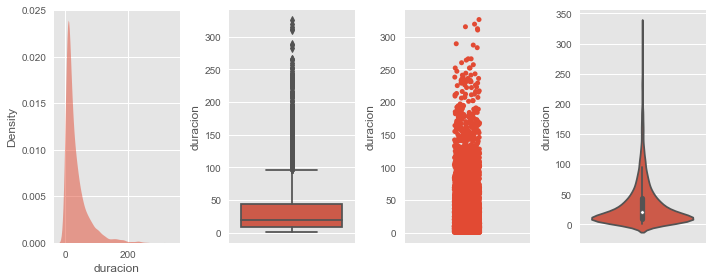

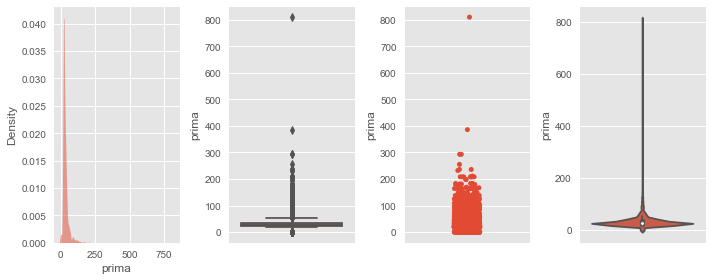

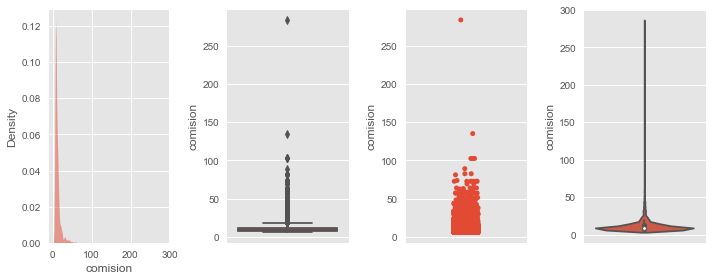

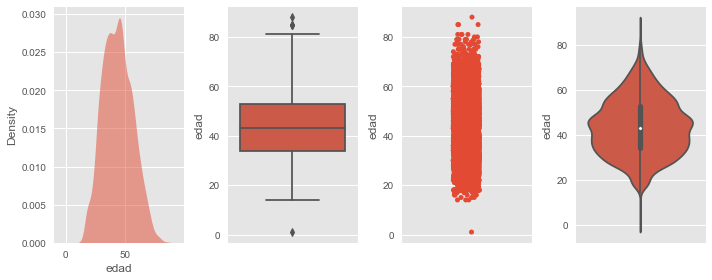

In [180]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

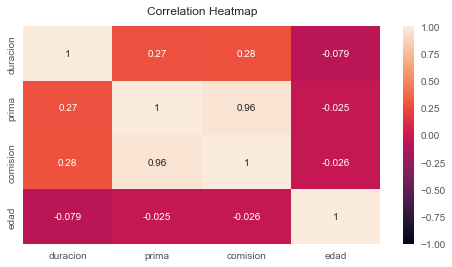

In [181]:
# Correlograma:
X = data[var_num]

# Increase the size of the heatmap.
plt.figure(figsize=(8, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## Explorar todas las variables cualitativas

In [182]:
#eliminar la variable "agencia"
del(data['agencia'])
#eliminar las variables numericas
var_cual = data.columns.drop(var_num)
var_cual

Index(['tipo_agencia', 'canal', 'producto', 'reclamacion', 'destino', 'sexo'], dtype='object')

*************************************************
Variable = tipo_agencia
*************************************************
          Frecuencias Relativas  Frecuencias Absolutas
Airlines                    1.0                   6329


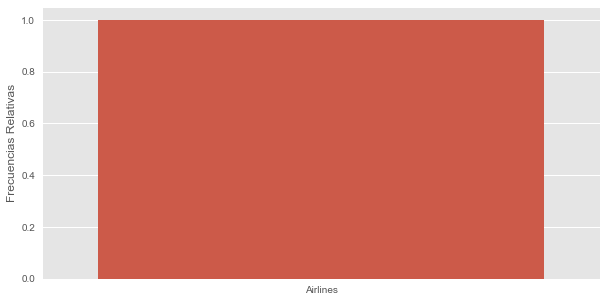

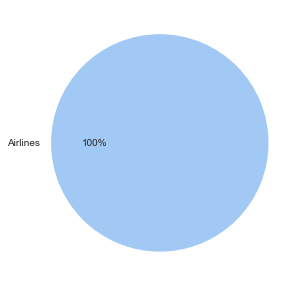

*************************************************
*************************************************
*************************************************
Variable = canal
*************************************************
         Frecuencias Relativas  Frecuencias Absolutas
Online                 0.99921                   6324
Offline                0.00079                      5


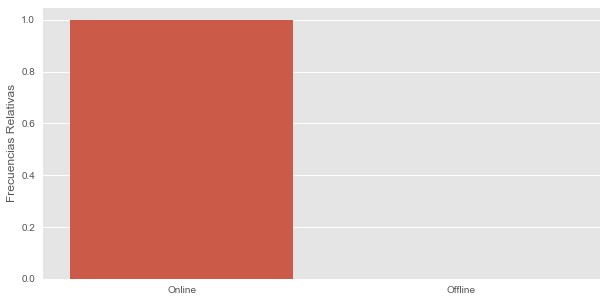

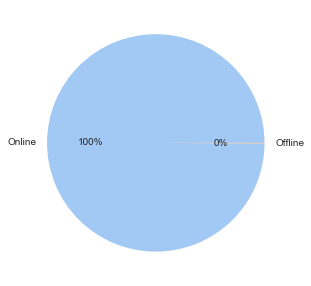

*************************************************
*************************************************
*************************************************
Variable = producto
*************************************************
              Frecuencias Relativas  Frecuencias Absolutas
Basic Plan                 0.864118                   5469
Value Plan                 0.134934                    854
Premier Plan               0.000948                      6


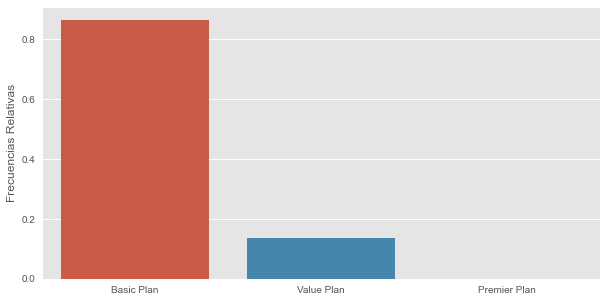

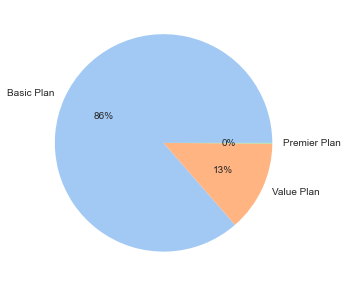

*************************************************
*************************************************
*************************************************
Variable = reclamacion
*************************************************
     Frecuencias Relativas  Frecuencias Absolutas
No                0.995102                   6298
Yes               0.004898                     31


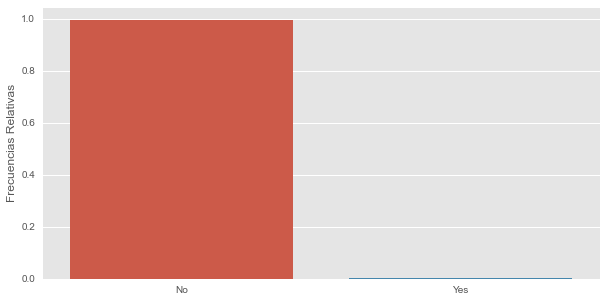

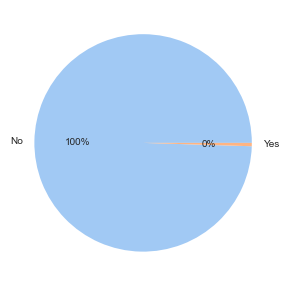

*************************************************
*************************************************
*************************************************
Variable = destino
*************************************************
                                        Frecuencias Relativas  \
CHINA                                                0.181703   
THAILAND                                             0.154527   
HONG KONG                                            0.097330   
MALAYSIA                                             0.093538   
INDONESIA                                            0.088956   
...                                                       ...   
NEW CALEDONIA                                        0.000158   
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF               0.000158   
FIJI                                                 0.000158   
OMAN                                                 0.000158   
HUNGARY                                              0.000158   



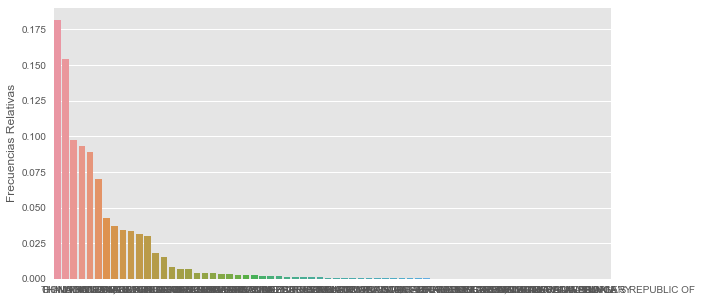

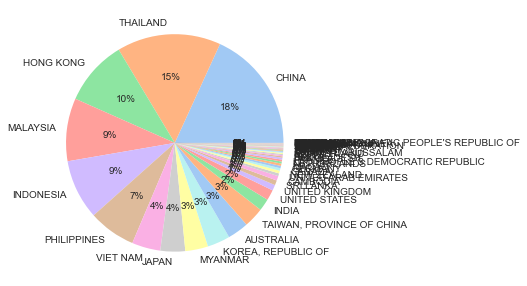

*************************************************
*************************************************
*************************************************
Variable = sexo
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
M               0.585559                   3706
F               0.414441                   2623


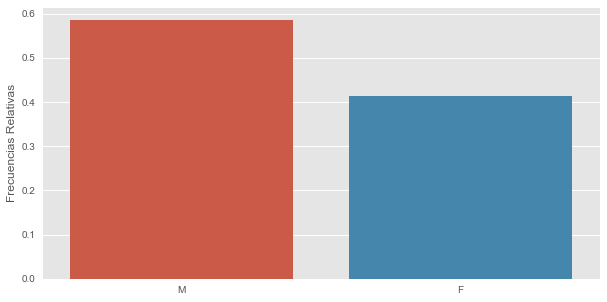

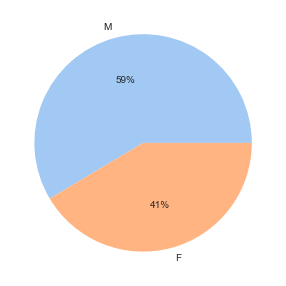

*************************************************
*************************************************


In [183]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# Selección de datos de entrada y salida

In [184]:
#eliminar variables que son muy poco significativas o no aportan nada
del(data['tipo_agencia'])
del(data['canal'])
del(data['reclamacion'])
#eliminar las variables numericas
var_cual = data.columns.drop(var_num)
#estas son las variables con las que nos quedamos 
var_num, var_cual

(['duracion', 'prima', 'comision', 'edad'],
 Index(['producto', 'destino', 'sexo'], dtype='object'))

# Convertir variables INT

In [185]:
#copiar el data en un nuevo dataframe
dataset = data.copy()
dataset.dtypes

producto     object
duracion      int64
destino      object
prima       float64
comision    float64
sexo         object
edad          int64
dtype: object

Las variables de tipo <b>OBJECT</b> hay que convertirlas a <b>INT</b>

Primero vamos a observar las variables OBJECT.

## producto

In [186]:
# valores de la variable "producto"
print('Tabla de frecuencias absolutas:')
print(dataset['producto'].value_counts())

Tabla de frecuencias absolutas:
Basic Plan      5469
Value Plan       854
Premier Plan       6
Name: producto, dtype: int64


## destino

In [187]:
# valores de la variable "destino"
print('Tabla de frecuencias absolutas:')
print(dataset['destino'].value_counts())

Tabla de frecuencias absolutas:
CHINA                                     1150
THAILAND                                   978
HONG KONG                                  616
MALAYSIA                                   592
INDONESIA                                  563
                                          ... 
NEW CALEDONIA                                1
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF       1
FIJI                                         1
OMAN                                         1
HUNGARY                                      1
Name: destino, Length: 68, dtype: int64


In [188]:
# valores de la variable "destino"
df_destino = dataset['destino'].value_counts()
df_destino.head(50)

CHINA                               1150
THAILAND                             978
HONG KONG                            616
MALAYSIA                             592
INDONESIA                            563
PHILIPPINES                          444
VIET NAM                             269
JAPAN                                233
MYANMAR                              215
KOREA, REPUBLIC OF                   214
AUSTRALIA                            199
TAIWAN, PROVINCE OF CHINA            189
INDIA                                113
UNITED STATES                         99
UNITED KINGDOM                        54
SRI LANKA                             45
CAMBODIA                              43
UNITED ARAB EMIRATES                  26
NEW ZEALAND                           26
CANADA                                24
GERMANY                               22
MACAO                                 22
NETHERLANDS                           19
LAO PEOPLE'S DEMOCRATIC REPUBLIC      18
FRANCE          

In [189]:
#filtrar por destino con una frecuencia menor de 10 repeticiones
dataset['destino'].value_counts()[dataset['destino'].value_counts() <= 10]

SWITZERLAND                               10
BRUNEI DARUSSALAM                          9
TURKEY                                     7
FINLAND                                    7
SPAIN                                      6
DENMARK                                    5
IRELAND                                    5
AUSTRIA                                    5
NORWAY                                     5
GUINEA                                     4
JORDAN                                     3
MONGOLIA                                   3
PAKISTAN                                   2
MALI                                       2
SWEDEN                                     2
QATAR                                      2
RUSSIAN FEDERATION                         2
BAHRAIN                                    2
ISRAEL                                     1
ETHIOPIA                                   1
TURKMENISTAN                               1
EGYPT                                      1
MEXICO    

In [190]:
# obtener en una lista los destinos menos frecuentes del punto anterior
list_destino = dataset.groupby('destino').filter(lambda x: len(x) <= 10)['destino'].unique()
list_destino

array(["KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'AUSTRIA', 'OMAN',
       'FIJI', 'SPAIN', 'BRUNEI DARUSSALAM', 'PORTUGAL', 'NEW CALEDONIA',
       'FINLAND', 'SAUDI ARABIA', 'JORDAN', 'SWEDEN', 'GUINEA', 'TURKEY',
       'MONGOLIA', 'AZERBAIJAN', 'PAKISTAN', 'SWITZERLAND', 'IRELAND',
       'LITHUANIA', 'MALI', 'DENMARK', 'PAPUA NEW GUINEA', 'BAHRAIN',
       'QATAR', 'KENYA', 'NORWAY', 'MAURITIUS', 'CYPRUS', 'ESTONIA',
       'RUSSIAN FEDERATION', 'ISRAEL', 'TURKMENISTAN', 'EGYPT', 'MEXICO',
       'BULGARIA', 'UZBEKISTAN', 'ETHIOPIA', 'BELGIUM', 'HUNGARY'],
      dtype=object)

In [191]:
#reemplazar el valor del país por el valor "OTHERS"
dataset = dataset.replace({'destino': list_destino}, 'OTHERS')
#mostrar la lista de destinos
print(dataset['destino'].value_counts())

CHINA                               1150
THAILAND                             978
HONG KONG                            616
MALAYSIA                             592
INDONESIA                            563
PHILIPPINES                          444
VIET NAM                             269
JAPAN                                233
MYANMAR                              215
KOREA, REPUBLIC OF                   214
AUSTRALIA                            199
TAIWAN, PROVINCE OF CHINA            189
INDIA                                113
OTHERS                               103
UNITED STATES                         99
UNITED KINGDOM                        54
SRI LANKA                             45
CAMBODIA                              43
UNITED ARAB EMIRATES                  26
NEW ZEALAND                           26
CANADA                                24
GERMANY                               22
MACAO                                 22
NETHERLANDS                           19
FRANCE          

In [192]:
len(dataset['destino'].value_counts()) # el número de registros diferentes

29

## sexo

In [193]:
# valores de la variable "sexo"
print('Tabla de frecuencias absolutas:')
print(dataset['sexo'].value_counts())

Tabla de frecuencias absolutas:
M    3706
F    2623
Name: sexo, dtype: int64


In [194]:
# reemplazar los valores de la columna "sexo"
dataset['sexo'] = dataset['sexo'].replace({'F': '0'})
dataset['sexo'] = dataset['sexo'].replace({'M': '1'})
# convertir variable a int
dataset['sexo'] = dataset['sexo'].astype('int64')
print(dataset['sexo'].value_counts())

1    3706
0    2623
Name: sexo, dtype: int64


# Variables dummies

## Variables dummies - one hot enconding

In [195]:
dataset.shape

(6329, 7)

In [196]:
#crear variables con dummies con hot_enconding
#crear el dataframe
#one_hot_encoded_data = pd.DataFrame()
#crear las variables dummies con one_hot_enconding
dataset_hot_enc = pd.get_dummies(dataset, columns = ['producto', 'destino'])
#mostrar el df
dataset_hot_enc.shape

(6329, 37)

In [197]:
dataset_hot_enc.dtypes

duracion                                      int64
prima                                       float64
comision                                    float64
sexo                                          int64
edad                                          int64
producto_Basic Plan                           uint8
producto_Premier Plan                         uint8
producto_Value Plan                           uint8
destino_AUSTRALIA                             uint8
destino_BANGLADESH                            uint8
destino_CAMBODIA                              uint8
destino_CANADA                                uint8
destino_CHINA                                 uint8
destino_FRANCE                                uint8
destino_GERMANY                               uint8
destino_HONG KONG                             uint8
destino_INDIA                                 uint8
destino_INDONESIA                             uint8
destino_ITALY                                 uint8
destino_JAPA

In [198]:
# convertir las variables de tipo "uint8 en "int64"
for i in range(len(dataset_hot_enc.columns)):
    if (dataset_hot_enc.dtypes[i]) == 'uint8':
        #print(dataset.columns[i])
        #        dataset.columns[i] = dataset.columns[i].astype('int64')
        dataset_hot_enc[dataset_hot_enc.columns[i]] = dataset_hot_enc[dataset_hot_enc.columns[i]].astype('int64')
    #dataset['sexo'] = dataset['sexo'].astype('int64')
dataset_hot_enc.dtypes

duracion                                      int64
prima                                       float64
comision                                    float64
sexo                                          int64
edad                                          int64
producto_Basic Plan                           int64
producto_Premier Plan                         int64
producto_Value Plan                           int64
destino_AUSTRALIA                             int64
destino_BANGLADESH                            int64
destino_CAMBODIA                              int64
destino_CANADA                                int64
destino_CHINA                                 int64
destino_FRANCE                                int64
destino_GERMANY                               int64
destino_HONG KONG                             int64
destino_INDIA                                 int64
destino_INDONESIA                             int64
destino_ITALY                                 int64
destino_JAPA

### Descripción de las variables explicativas

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

In [199]:
dataset_hot_enc.head(5)

duracion  prima  comision  sexo  edad  producto_Basic Plan  \
5          66  121.0     42.35     0    44                    0   
10         33   26.0      9.10     0    18                    1   
11          1   18.0      6.30     1    47                    1   
18          3   18.0      6.30     1    47                    1   
109        45   26.0      9.10     1    31                    1   

     producto_Premier Plan  producto_Value Plan  destino_AUSTRALIA  \
5                        0                    1                  0   
10                       0                    0                  0   
11                       0                    0                  0   
18                       0                    0                  0   
109                      0                    0                  1   

     destino_BANGLADESH  ...  destino_NEW ZEALAND  destino_OTHERS  \
5                     0  ...                    0               0   
10                    0  ...                    0               1   
11                    0  ...                    0               0   
18                    0  ...                    0               0   
109                   0  ...                    0               0   

     destino_PHILIPPINES  destino_SRI LANKA  \
5                      0                  0   
10                     0                  0   
11                     0                  0   
18                     0                  0   
109                    0                  0   

     destino_TAIWAN, PROVINCE OF CHINA  destino_THAILAND  \
5                                    0                 0   
10                                   0                 0   
11                                   0                 0   
18                                   0                 0   
109                                  0                 0   

     destino_UNITED ARAB EMIRATES  destino_UNITED KINGDOM  \
5                               0                       0   
10                              0                       0   
11                              0                       0   
18                              0                       0   
109                             0                       0   

     destino_UNITED STATES  destino_VIET NAM  
5                        1                 0  
10                       0                 0  
11                       0                 0  
18                       0                 0  
109                      0                 0  

[5 rows x 37 columns]

In [200]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
pd.DataFrame(dataset_hot_enc.mean(axis=0))

----------------------
Media de cada variable
----------------------


0
duracion                                  34.160057
prima                                     32.803918
comision                                  11.766669
sexo                                       0.585559
edad                                      43.529152
producto_Basic Plan                        0.864118
producto_Premier Plan                      0.000948
producto_Value Plan                        0.134934
destino_AUSTRALIA                          0.031443
destino_BANGLADESH                         0.002054
destino_CAMBODIA                           0.006794
destino_CANADA                             0.003792
destino_CHINA                              0.181703
destino_FRANCE                             0.002844
destino_GERMANY                            0.003476
destino_HONG KONG                          0.097330
destino_INDIA                              0.017854
destino_INDONESIA                          0.088956
destino_ITALY                              0.001738
destino_JAPAN                              0.036815
destino_KOREA, REPUBLIC OF                 0.033813
destino_LAO PEOPLE'S DEMOCRATIC REPUBLIC   0.002844
destino_MACAO                              0.003476
destino_MALAYSIA                           0.093538
destino_MYANMAR                            0.033971
destino_NEPAL                              0.001738
destino_NETHERLANDS                        0.003002
destino_NEW ZEALAND                        0.004108
destino_OTHERS                             0.016274
destino_PHILIPPINES                        0.070153
destino_SRI LANKA                          0.007110
destino_TAIWAN, PROVINCE OF CHINA          0.029863
destino_THAILAND                           0.154527
destino_UNITED ARAB EMIRATES               0.004108
destino_UNITED KINGDOM                     0.008532
destino_UNITED STATES                      0.015642
destino_VIET NAM                           0.042503

In [201]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
pd.DataFrame(dataset_hot_enc.var(axis=0))

-------------------------
Varianza de cada variable
-------------------------


0
duracion                                  1580.962526
prima                                      669.372260
comision                                    82.672450
sexo                                         0.242718
edad                                       157.202729
producto_Basic Plan                          0.117437
producto_Premier Plan                        0.000947
producto_Value Plan                          0.116746
destino_AUSTRALIA                            0.030459
destino_BANGLADESH                           0.002050
destino_CAMBODIA                             0.006749
destino_CANADA                               0.003778
destino_CHINA                                0.148711
destino_FRANCE                               0.002836
destino_GERMANY                              0.003465
destino_HONG KONG                            0.087871
destino_INDIA                                0.017538
destino_INDONESIA                            0.081055
destino_ITALY                                0.001735
destino_JAPAN                                0.035465
destino_KOREA, REPUBLIC OF                   0.032674
destino_LAO PEOPLE'S DEMOCRATIC REPUBLIC     0.002836
destino_MACAO                                0.003465
destino_MALAYSIA                             0.084802
destino_MYANMAR                              0.032822
destino_NEPAL                                0.001735
destino_NETHERLANDS                          0.002994
destino_NEW ZEALAND                          0.004092
destino_OTHERS                               0.016012
destino_PHILIPPINES                          0.065242
destino_SRI LANKA                            0.007061
destino_TAIWAN, PROVINCE OF CHINA            0.028975
destino_THAILAND                             0.130669
destino_UNITED ARAB EMIRATES                 0.004092
destino_UNITED KINGDOM                       0.008461
destino_UNITED STATES                        0.015400
destino_VIET NAM                             0.040703

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA.

Las variables que tienen una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

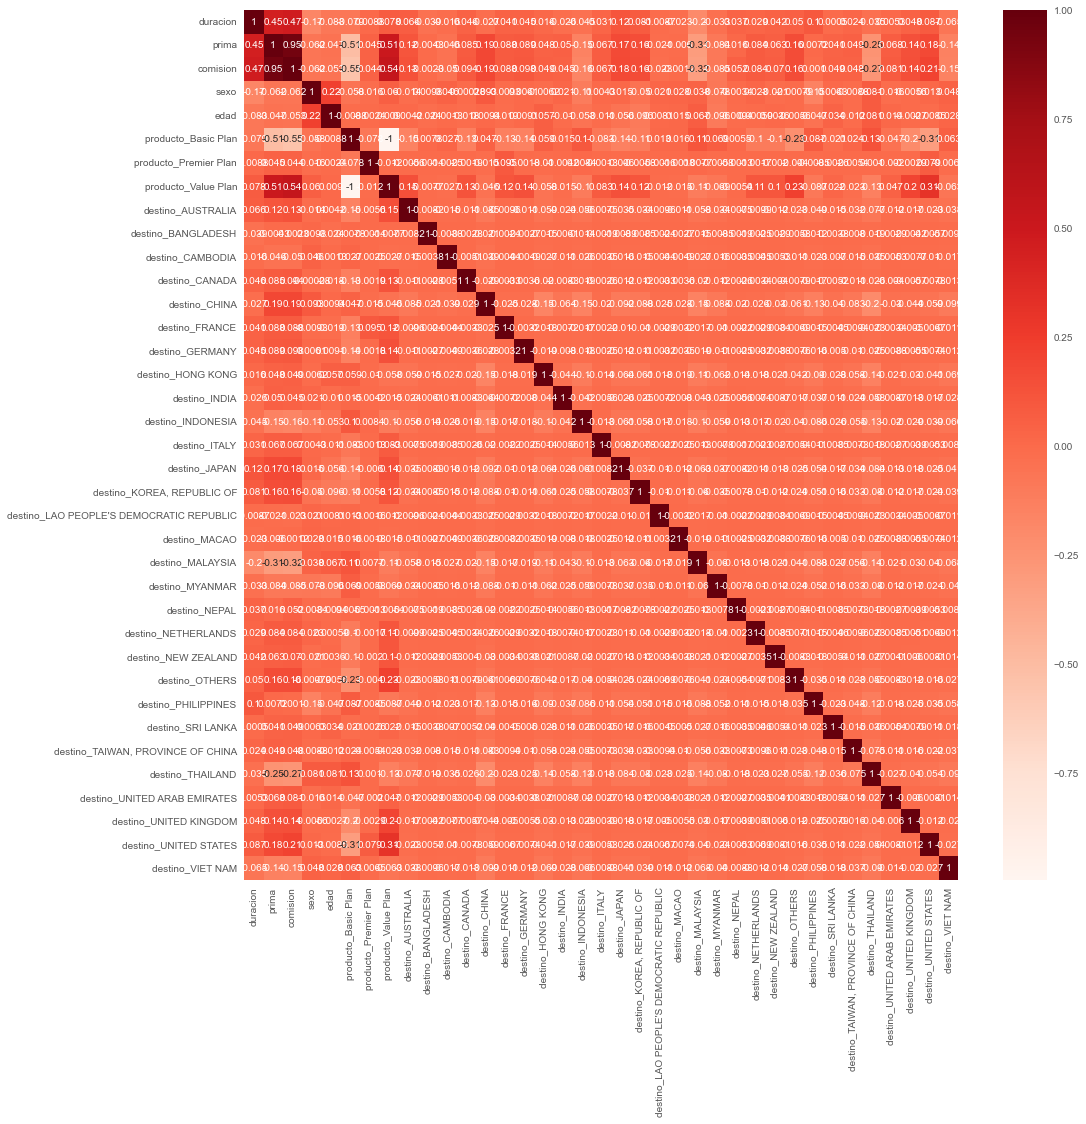

In [202]:
# Correlograma con el coeficiente de spearman
plt.figure(figsize=(16,16))
cor = dataset_hot_enc.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Análisis de componentes principales - PCA

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [203]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataset_hot_enc)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [204]:
# Visualizamos los componentes de los PCS:

pc_num = np.arange(1,len(dataset_hot_enc.columns)+1)
pc_str = ["%.0f" % pc_num  for pc_num  in pc_num]
string_add = 'PC_'
index_pca = [string_add + x for x in pc_str]


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataset_hot_enc.columns,
    index   = index_pca
)

duracion         prima      comision          sexo          edad  \
PC_1   1.390398e-01  4.491819e-01  4.595359e-01 -3.650877e-03 -1.937350e-02   
PC_2   3.985969e-01  5.694426e-02  5.356019e-02 -5.492699e-01 -4.214108e-01   
PC_3  -3.419443e-02  1.009489e-01  9.518300e-02  3.712212e-02 -9.671689e-02   
PC_4   2.618432e-01  1.553113e-01  1.504921e-01  4.614186e-02  2.496673e-01   
PC_5  -2.204226e-01  7.554312e-02  7.609047e-02 -1.136017e-01  5.870714e-02   
PC_6  -1.341644e-01 -8.110821e-03 -1.006254e-02  7.238928e-03 -2.436479e-01   
PC_7   7.650565e-02  3.349957e-03  3.624133e-03 -4.191015e-03  4.691706e-02   
PC_8  -8.109165e-02  1.623216e-02  1.441113e-02  3.746262e-02 -2.173357e-01   
PC_9   1.362442e-01 -7.504937e-02 -7.267085e-02  5.203716e-02 -1.109504e-02   
PC_10  2.029618e-02 -2.370349e-03 -1.701832e-03  9.210167e-02  8.005740e-03   
PC_11 -8.315665e-02 -4.335705e-02 -4.406053e-02 -1.151234e-01  5.268348e-02   
PC_12  1.706870e-02  9.360284e-03  5.785842e-03  1.259172e-02 -1.427205e-02   
PC_13  3.436444e-02  5.683322e-03  7.830285e-03  1.107037e-02  1.648994e-02   
PC_14  5.072406e-03  9.520551e-03  1.359156e-02  6.510882e-02 -3.431695e-02   
PC_15  9.824627e-02  2.106832e-02  4.536559e-02  2.917643e-02  9.151916e-04   
PC_16  3.545300e-02  3.440122e-03 -6.728911e-03  1.340064e-02 -9.924324e-03   
PC_17 -2.627038e-02 -3.251901e-03 -4.039650e-03  5.534825e-02 -2.579666e-02   
PC_18  1.623864e-02 -6.394436e-03  4.100761e-03 -1.139990e-02  6.023086e-02   
PC_19  4.773652e-02  2.336194e-03  8.620698e-04  1.899002e-02  1.649514e-02   
PC_20  9.485596e-03 -1.330651e-02 -9.765914e-03  5.396370e-04  6.043111e-03   
PC_21  1.859973e-02 -4.688573e-03  6.700376e-03 -1.807816e-03 -1.919289e-03   
PC_22  2.146400e-03  4.734205e-04  6.039652e-03 -1.752746e-02  1.767526e-02   
PC_23  1.605663e-02 -1.896714e-03  3.539423e-03  1.114277e-02  2.334281e-02   
PC_24  8.163673e-04  5.370970e-03 -3.030334e-03 -3.505380e-03  1.107931e-02   
PC_25 -1.003243e-02  7.382381e-04  2.821663e-03 -4.947679e-03 -1.269587e-02   
PC_26  3.564551e-03 -2.060420e-03  3.009492e-03  4.863307e-03 -3.573999e-03   
PC_27  5.131459e-03 -4.210267e-03  7.000949e-03  3.877279e-03 -8.702539e-03   
PC_28  3.662945e-04  2.111386e-03 -7.624218e-04  5.054330e-04 -1.540107e-03   
PC_29  9.455849e-02 -6.798662e-03 -1.350396e-02 -4.019141e-02 -1.219732e-02   
PC_30  5.025663e-01  1.526623e-01  1.362946e-01 -6.000146e-02  4.623980e-02   
PC_31  2.455115e-01  2.131668e-02  1.543205e-02  2.623005e-01  6.167127e-01   
PC_32  1.862706e-01  1.799413e-02  1.944812e-02  7.554223e-01 -4.897908e-01   
PC_33 -5.201430e-01  3.266455e-01  2.926833e-01  5.953995e-03  4.182957e-02   
PC_34 -5.939389e-02  3.938975e-01  3.111187e-01  4.035003e-02 -5.730218e-02   
PC_35 -1.052795e-02 -6.783444e-01  7.323921e-01  4.078271e-04 -3.095201e-04   
PC_36 -4.006935e-16  1.215849e-15 -1.793622e-16 -4.260423e-17 -2.176916e-16   
PC_37 -0.000000e+00 -1.308871e-16  1.489437e-16  9.893809e-17  2.215436e-16   

       producto_Basic Plan  producto_Premier Plan  producto_Value Plan  \
PC_1             -0.438891               0.045096             0.436127   
PC_2              0.145411               0.009648            -0.146710   
PC_3              0.116476               0.014560            -0.118132   
PC_4              0.195898               0.233247            -0.217487   
PC_5              0.046325               0.417475            -0.084067   
PC_6             -0.030069               0.222734             0.010095   
PC_7              0.013966              -0.006060            -0.013461   
PC_8              0.016589               0.084709            -0.024269   
PC_9             -0.055101               0.374846             0.021498   
PC_10             0.009257               0.083506            -0.016806   
PC_11            -0.064677               0.101954             0.055684   
PC_12             0.009795              -0.026200            -0.007464   
PC_13             0.016352               0.007

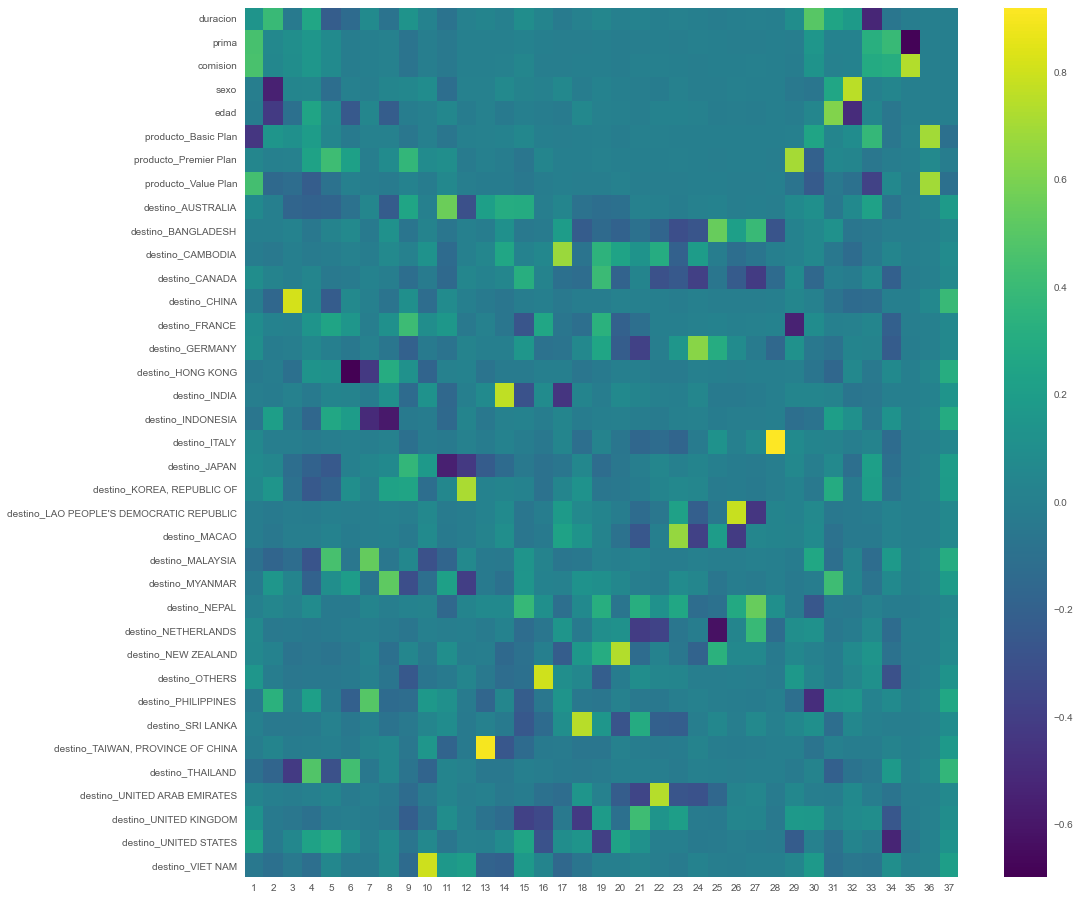

In [205]:
# Heatmap de los componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataset_hot_enc.columns)), dataset_hot_enc.columns)
plt.xticks(range(len(dataset_hot_enc.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();
plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.04663854e-01 4.26805324e-02 3.31012042e-02 3.22157448e-02
 3.15444940e-02 3.07636718e-02 2.96216912e-02 2.91221162e-02
 2.87700287e-02 2.85709967e-02 2.82502797e-02 2.80019438e-02
 2.79338188e-02 2.76491312e-02 2.75231632e-02 2.74307751e-02
 2.73541484e-02 2.72969629e-02 2.72646447e-02 2.71868756e-02
 2.71645301e-02 2.71586597e-02 2.71443209e-02 2.71338717e-02
 2.71129677e-02 2.71099124e-02 2.71030459e-02 2.70785881e-02
 2.41954899e-02 2.38413811e-02 2.29411976e-02 1.91101237e-02
 1.48231255e-02 1.00168373e-02 1.11987070e-03 2.05310100e-32
 8.18282850e-33]


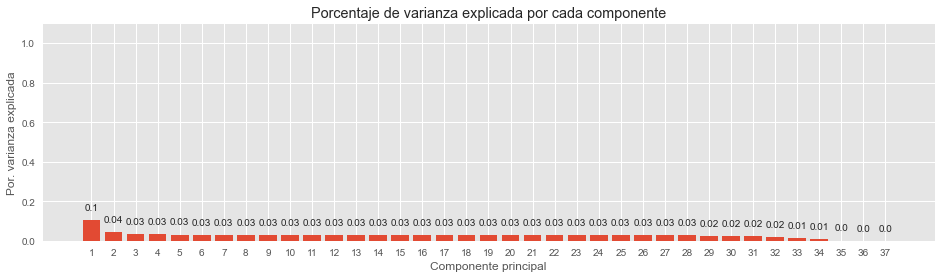

In [206]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataset_hot_enc.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.10466385 0.14734439 0.18044559 0.21266134 0.24420583 0.2749695
 0.30459119 0.33371331 0.36248334 0.39105433 0.41930461 0.44730656
 0.47524038 0.50288951 0.53041267 0.55784345 0.58519759 0.61249456
 0.6397592  0.66694608 0.69411061 0.72126927 0.74841359 0.77554746
 0.80266043 0.82977034 0.85687339 0.88395197 0.90814746 0.93198885
 0.95493004 0.97404017 0.98886329 0.99888013 1.         1.
 1.        ]


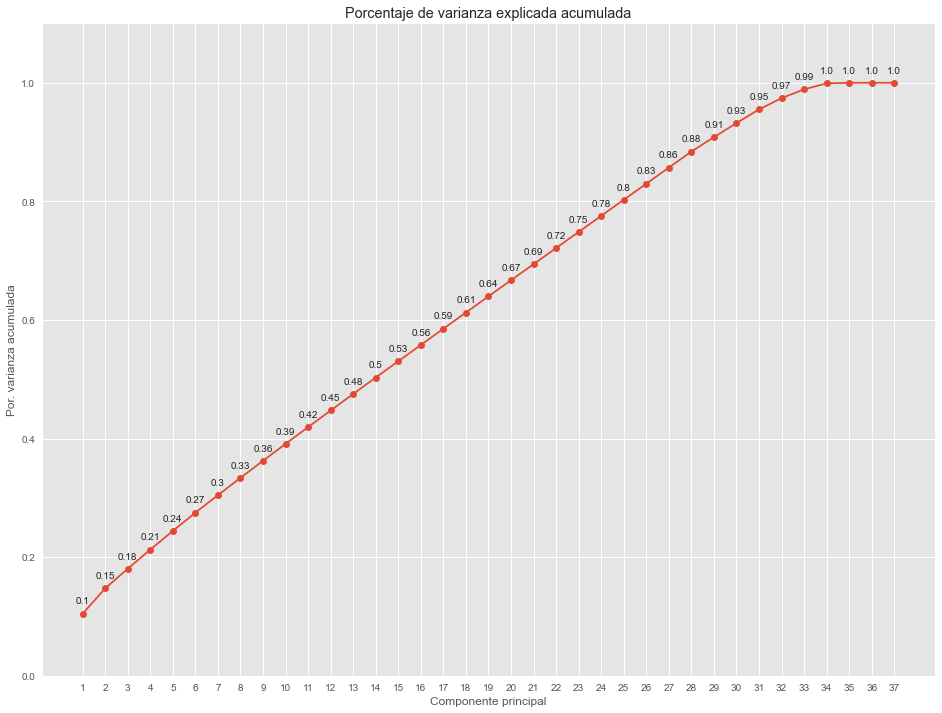

In [207]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))
ax.plot(
    np.arange(len(dataset_hot_enc.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataset_hot_enc.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.show()

## Variables dummies - convertir

In [208]:
dataset_dummies = dataset.copy()
dataset_dummies.shape

(6329, 7)

In [209]:
dataset_dummies.dtypes

producto     object
duracion      int64
destino      object
prima       float64
comision    float64
sexo          int64
edad          int64
dtype: object

### Descripción de las variables explicativas

#### producto

In [210]:
# valores de la variable "producto"
print('Tabla de frecuencias absolutas:')
print(dataset_dummies['producto'].value_counts())

Tabla de frecuencias absolutas:
Basic Plan      5469
Value Plan       854
Premier Plan       6
Name: producto, dtype: int64


In [211]:
# reemplazar los valores de la columna "producto"
dataset_dummies['producto'] = dataset_dummies['producto'].replace({'Basic Plan': '1'})
dataset_dummies['producto'] = dataset_dummies['producto'].replace({'Value Plan': '2'})
dataset_dummies['producto'] = dataset_dummies['producto'].replace({'Premier Plan': '3'})
# convertir variable a int
dataset_dummies['producto'] = dataset_dummies['producto'].astype('int64')
print(dataset_dummies['producto'].value_counts())

1    5469
2     854
3       6
Name: producto, dtype: int64


#### destino

In [212]:
# valores de la variable "destino"
print('Tabla de frecuencias absolutas:')
print(dataset_dummies['destino'].value_counts())

Tabla de frecuencias absolutas:
CHINA                               1150
THAILAND                             978
HONG KONG                            616
MALAYSIA                             592
INDONESIA                            563
PHILIPPINES                          444
VIET NAM                             269
JAPAN                                233
MYANMAR                              215
KOREA, REPUBLIC OF                   214
AUSTRALIA                            199
TAIWAN, PROVINCE OF CHINA            189
INDIA                                113
OTHERS                               103
UNITED STATES                         99
UNITED KINGDOM                        54
SRI LANKA                             45
CAMBODIA                              43
UNITED ARAB EMIRATES                  26
NEW ZEALAND                           26
CANADA                                24
GERMANY                               22
MACAO                                 22
NETHERLANDS              

In [213]:
# crear una lista con los destinos
lista_destino = dataset_dummies['destino'].value_counts()
# convertir a lista
lista_destino = lista_destino.index.values.tolist() 
lista_destino

['CHINA',
 'THAILAND',
 'HONG KONG',
 'MALAYSIA',
 'INDONESIA',
 'PHILIPPINES',
 'VIET NAM',
 'JAPAN',
 'MYANMAR',
 'KOREA, REPUBLIC OF',
 'AUSTRALIA',
 'TAIWAN, PROVINCE OF CHINA',
 'INDIA',
 'OTHERS',
 'UNITED STATES',
 'UNITED KINGDOM',
 'SRI LANKA',
 'CAMBODIA',
 'UNITED ARAB EMIRATES',
 'NEW ZEALAND',
 'CANADA',
 'GERMANY',
 'MACAO',
 'NETHERLANDS',
 'FRANCE',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'BANGLADESH',
 'ITALY',
 'NEPAL']

In [214]:
# crear una data frame para almacenar la correspondencia entre el valor entero y el valor object
df_destino = pd.DataFrame({'destino' : np.empty(len(lista_destino)),
                                       'valor' : np.empty(len(lista_destino)),
                                      })
j = 0
df_destino.index = lista_destino
for i in range(len(lista_destino)):
    # convertir cada destino en un valor entero
    dataset_dummies['destino'] = dataset_dummies['destino'].replace({lista_destino[i]: j})
    # añadir el valor a una lista para luego consultarlo
    df_destino['destino'].loc[lista_destino[j]]=lista_destino[i]
    df_destino['valor'].loc[lista_destino[j]]=i
    #destino_corresp.append(lista_[i])
    j = j + 1
df_destino.head(5)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4888/2655268484.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



destino  valor
CHINA          CHINA    0.0
THAILAND    THAILAND    1.0
HONG KONG  HONG KONG    2.0
MALAYSIA    MALAYSIA    3.0
INDONESIA  INDONESIA    4.0

### Análisis de componentes principales - PCA

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [215]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataset_dummies)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [216]:
# Visualizamos los componentes de los PCS:

pc_num = np.arange(1,len(dataset_dummies.columns)+1)
pc_str = ["%.0f" % pc_num  for pc_num  in pc_num]
string_add = 'PC_'
index_pca = [string_add + x for x in pc_str]


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataset_dummies.columns,
    index   = index_pca
)

producto  duracion   destino     prima  comision      sexo      edad
PC_1  0.450330  0.216183  0.363015  0.550587  0.558517 -0.041385 -0.043452
PC_2 -0.208644  0.395335  0.028106 -0.048375 -0.050749 -0.670238 -0.587582
PC_3 -0.226115  0.726354 -0.271915  0.065123  0.056629 -0.031910  0.582133
PC_4 -0.086643  0.403574 -0.085604 -0.009753 -0.008496  0.731936 -0.535159
PC_5  0.131451 -0.202184 -0.876031  0.276805  0.249182 -0.090218 -0.166015
PC_6 -0.822667 -0.256009  0.135962  0.367275  0.316384  0.064643 -0.004923
PC_7 -0.031221 -0.009715 -0.015778 -0.691857  0.721120 -0.001172 -0.000191

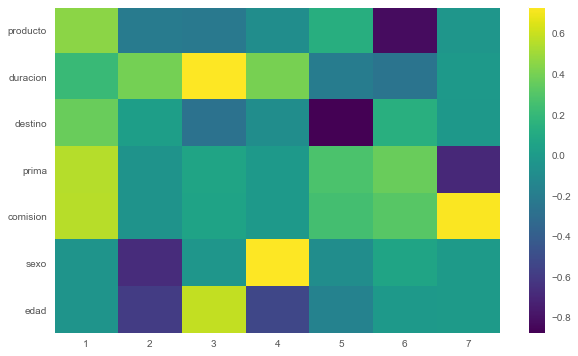

In [217]:
# Heatmap de los componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataset_dummies.columns)), dataset_dummies.columns)
plt.xticks(range(len(dataset_dummies.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();
plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.40397948 0.18624807 0.13095816 0.1069033  0.10139826 0.06437392
 0.00613882]


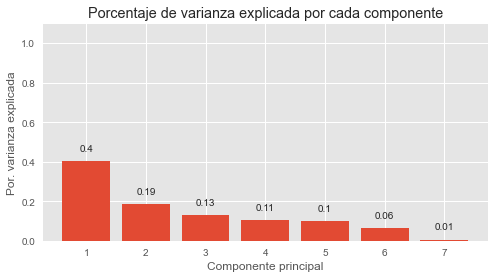

In [218]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dataset_dummies.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.40397948 0.59022754 0.7211857  0.828089   0.92948726 0.99386118
 1.        ]


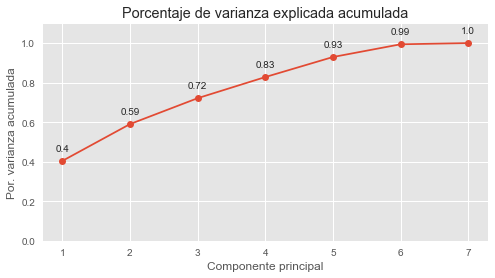

In [219]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(
    np.arange(len(dataset_dummies.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dataset_dummies.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
plt.show()

In [220]:
# Contribuciones de cada componentes a la variable

pc_num = np.arange(1,len(dataset_dummies.columns)+1)
pc_str = ["%.0f" % pc_num  for pc_num  in pc_num]
string_add = 'PCA_'
index_pca = [string_add + x for x in pc_str]

#loading_matrix = modelo_pca.components_.T * np.sqrt(modelo_pca.explained_variance_)
contribution = modelo_pca.components_*modelo_pca.components_

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = contribution,
    columns = dataset_dummies.columns,
    index   = index_pca
)

producto  duracion   destino     prima  comision      sexo  \
PCA_1  0.202798  0.046735  0.131780  0.303146  0.311941  0.001713   
PCA_2  0.043532  0.156290  0.000790  0.002340  0.002575  0.449219   
PCA_3  0.051128  0.527589  0.073938  0.004241  0.003207  0.001018   
PCA_4  0.007507  0.162872  0.007328  0.000095  0.000072  0.535730   
PCA_5  0.017279  0.040878  0.767430  0.076621  0.062091  0.008139   
PCA_6  0.676781  0.065541  0.018486  0.134891  0.100099  0.004179   
PCA_7  0.000975  0.000094  0.000249  0.478666  0.520014  0.000001   

               edad  
PCA_1  1.888083e-03  
PCA_2  3.452530e-01  
PCA_3  3.388785e-01  
PCA_4  2.863952e-01  
PCA_5  2.756083e-02  
PCA_6  2.423856e-05  
PCA_7  3.653915e-08

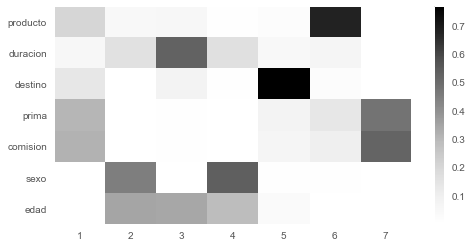

In [221]:
# Heatmap de las contribuciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_*modelo_pca.components_
plt.imshow(componentes.T, aspect='auto')
plt.yticks(range(len(dataset_dummies.columns)), dataset_dummies.columns)
plt.xticks(range(len(dataset_dummies.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();
plt.show()

In [319]:
# Visualizacion de los puntos en el espacio de componentes principales

import plotly.express as px
from sklearn.decomposition import PCA

df = dataset_dummies
features = dataset_dummies.columns

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5)
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [320]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dataset_dummies
features = dataset_dummies.columns
X = df[features]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}    
)
fig.update_traces(marker_size = 3)

fig.show()

In [313]:
# Visualizacion de las direccion de las variables en los espacios de componentes principales:

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = dataset_dummies
features = dataset_dummies.columns
X = df[features]

pca = PCA(n_components=4)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

# Cluster

## K-means - one-hot-enconding

In [226]:
data_completo = dataset_hot_enc.copy()
data_completo.shape

(6329, 37)

In [227]:
data_completo

duracion  prima  comision  sexo  edad  producto_Basic Plan  \
5            66  121.0     42.35     0    44                    0   
10           33   26.0      9.10     0    18                    1   
11            1   18.0      6.30     1    47                    1   
18            3   18.0      6.30     1    47                    1   
109          45   26.0      9.10     1    31                    1   
...         ...    ...       ...   ...   ...                  ...   
63321       111   35.0     12.25     1    31                    1   
63322        58   40.0     14.00     0    40                    1   
63323         2   18.0      6.30     1    57                    1   
63324         3   18.0      6.30     1    63                    1   
63325        22   26.0      9.10     0    35                    1   

       producto_Premier Plan  producto_Value Plan  destino_AUSTRALIA  \
5                          0                    1                  0   
10                         0                    0                  0   
11                         0                    0                  0   
18                         0                    0                  0   
109                        0                    0                  1   
...                      ...                  ...                ...   
63321                      0                    0                  0   
63322                      0                    0                  0   
63323                      0                    0                  0   
63324                      0                    0                  0   
63325                      0                    0                  0   

       destino_BANGLADESH  ...  destino_NEW ZEALAND  destino_OTHERS  \
5                       0  ...                    0               0   
10                      0  ...                    0               1   
11                      0  ...                    0               0   
18                      0  ...                    0               0   
109                     0  ...                    0               0   
...                   ...  ...                  ...             ...   
63321                   0  ...                    0               0   
63322                   0  ...                    0               0   
63323                   0  ...                    0               0   
63324                   0  ...                    0               0   
63325                   0  ...                    0               0   

       destino_PHILIPPINES  destino_SRI LANKA  \
5                        0                  0   
10                       0                  0   
11                       0                  0   
18                       0                  0   
109                      0                  0   
...                    ...                ...   
63321                    0                  0   
63322                    0                  0   
63323                    0                  0   
63324                    0                  0   
63325                    0                  0   

       destino_TAIWAN, PROVINCE OF CHINA  destino_THAILAND  \
5                                      0                 0   
10                                     0                 0   
11                                     0                 0   
18                                     0                 0   
109                                    0                 0   
...                                  ...               ...   
63321                                  0                 0   
63322                                  0                 0   
63323                                  0                 0   
63324                                  0                 0   
63325                                  0                 0   

       destino_UNITED ARAB EMIRATES  destino_UNITED KINGDOM  \
5                                 0                       0   


In [228]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing
data_escalada = StandardScaler().fit_transform(data_completo)
data_escalada

array([[ 0.80084009,  3.40917855,  3.36386602, ..., -0.09276625,
         7.93279856, -0.21068801],
       [-0.02917782, -0.26300231, -0.29330743, ..., -0.09276625,
        -0.12605892, -0.21068801],
       [-0.83404367, -0.57223859, -0.60127994, ..., -0.09276625,
        -0.12605892, -0.21068801],
       ...,
       [-0.80889161, -0.57223859, -0.60127994, ..., -0.09276625,
        -0.12605892, -0.21068801],
       [-0.78373956, -0.57223859, -0.60127994, ..., -0.09276625,
        -0.12605892,  4.7463545 ],
       [-0.30585046, -0.26300231, -0.29330743, ..., -0.09276625,
        -0.12605892, -0.21068801]])

In [229]:
#Se determina las variables a evaluar
X = data_escalada.copy()

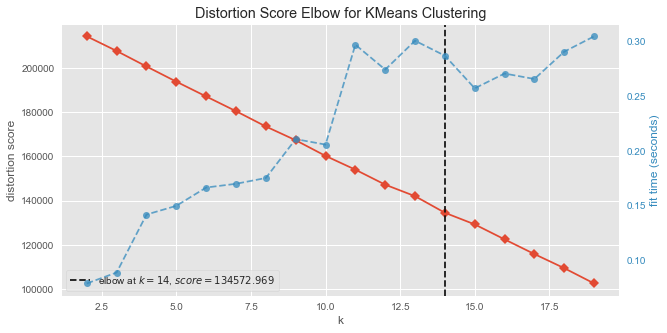

Nº de custlers optimo:  14
Wall time: 4.35 s


In [230]:
%%time
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)
print("Nº de custlers optimo: ", elbow.elbow_value_)

In [231]:
#numero de cluster optimo
k = 9

In [232]:
#ejecutar el algoritmo k-means
kmeans = KMeans(n_clusters=k, init = 'k-means++', 
                   max_iter = 300, n_init = 10).fit(X)

In [233]:
#Se obtiene los datos de los centroides
centroides = kmeans.cluster_centers_
#centroides

In [234]:
#se obtienen las etiquetas del cluster
etiquetas = kmeans.labels_
etiquetas

array([7, 1, 5, ..., 5, 0, 1])

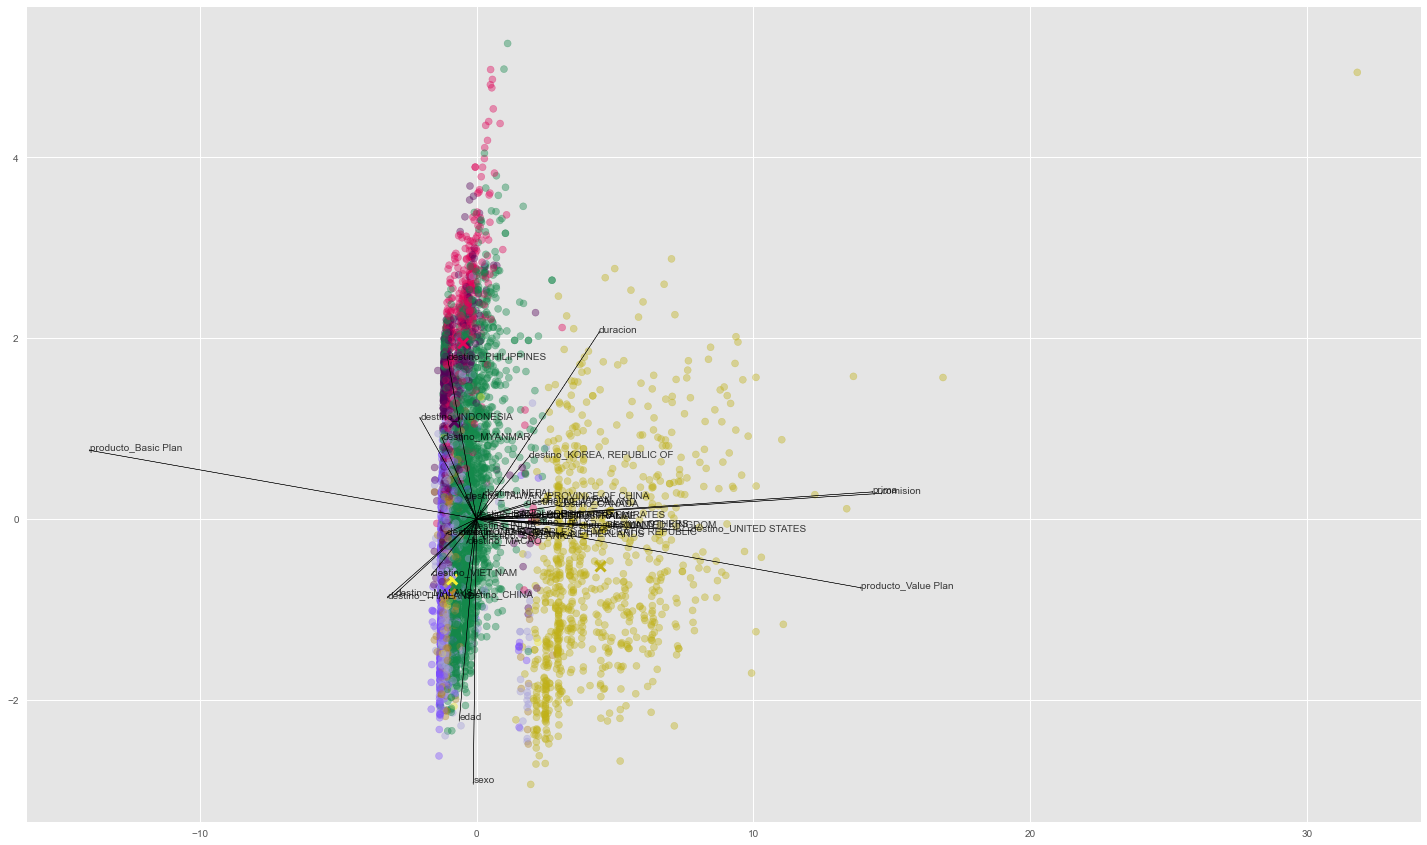

In [235]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
#colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
import random
number_of_colors = k
lista_colores = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


#Se asignan los colores a cada clústeres
colores_cluster = [lista_colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = lista_colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data_completo.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

In [236]:
#añadir el cluster a un nuevo df
dataset_dummies_km = data_completo.copy()
clusters_kmeans = kmeans.labels_
dataset_dummies_km["cluster"] = clusters_kmeans
dataset_dummies_km["cluster"] = dataset_dummies_km["cluster"] + 1
dataset_dummies_km.head(8)

duracion  prima  comision  sexo  edad  producto_Basic Plan  \
5          66  121.0     42.35     0    44                    0   
10         33   26.0      9.10     0    18                    1   
11          1   18.0      6.30     1    47                    1   
18          3   18.0      6.30     1    47                    1   
109        45   26.0      9.10     1    31                    1   
110       181   30.0     10.50     0    48                    1   
111         5   22.0      7.70     0    29                    1   
112        22   18.0      6.30     1    66                    1   

     producto_Premier Plan  producto_Value Plan  destino_AUSTRALIA  \
5                        0                    1                  0   
10                       0                    0                  0   
11                       0                    0                  0   
18                       0                    0                  0   
109                      0                    0                  1   
110                      0                    0                  0   
111                      0                    0                  0   
112                      0                    0                  0   

     destino_BANGLADESH  ...  destino_OTHERS  destino_PHILIPPINES  \
5                     0  ...               0                    0   
10                    0  ...               1                    0   
11                    0  ...               0                    0   
18                    0  ...               0                    0   
109                   0  ...               0                    0   
110                   0  ...               0                    0   
111                   0  ...               0                    0   
112                   0  ...               0                    0   

     destino_SRI LANKA  destino_TAIWAN, PROVINCE OF CHINA  destino_THAILAND  \
5                    0                                  0                 0   
10                   0                                  0                 0   
11                   0                                  0                 0   
18                   0                                  0                 0   
109                  0                                  0                 0   
110                  0                                  0                 0   
111                  0                                  0                 0   
112                  0                                  0                 1   

     destino_UNITED ARAB EMIRATES  destino_UNITED KINGDOM  \
5                               0                       0   
10                              0                       0   
11                              0                       0   
18                              0                       0   
109                             0                       0   
110                             0                       0   
111                             0                       0   
112                             0                       0   

     destino_UNITED STATES  destino_VIET NAM  cluster  
5                        1                 0        8  
10                       0                 0        2  
11                       0                 0        6  
18                       0                 0        6  
109                      0                 0        2  
110                      0                 0        5  
111                      0                 0        5  
112                      0                 0        7  

[8 rows x 38 columns]

In [237]:
# valores de la variable "cluster"
print('Tabla de frecuencias absolutas:')
print(dataset_dummies_km['cluster'].value_counts())

Tabla de frecuencias absolutas:
2    2641
7     979
8     802
6     591
5     562
4     442
1     269
3      43
Name: cluster, dtype: int64


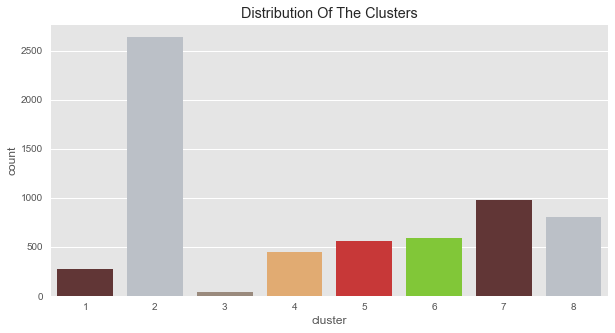

In [238]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#DF2020', '#81DF20']
pl = sns.countplot(x=dataset_dummies_km["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [239]:
# CALCULAR LOS ESTADISTICOS PRINCIPALES AGRUPADOS POR EL CLUSTER

# copiar el dataframe
data_ = dataset_dummies_km.copy()
# variable respuesta, es el cluster 
respuesta = np.array(["cluster"])

# Medidas de centralidad: Media, mediana, máximo y mínimo
#Calcular la media
media = data_.groupby(respuesta[0]).mean()
#convertir las columnas en filas
media = media.unstack()
#Calcular la mediana
mediana = data_.groupby(respuesta[0]).median()
#convertir las columnas en filas
mediana = mediana.unstack()
#Calcular el máximo
maximo = data_.groupby(respuesta[0]).max()
#convertir las columnas en filas
maximo = maximo.unstack()
#Calcular el minimo
minimo = data_.groupby(respuesta[0]).min()
#convertir las columnas en filas
minimo = minimo.unstack()

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
#Calcular la desviación estandar
desv = data_.groupby(respuesta[0]).std()
#convertir las columnas en filas
desv = desv.unstack()
#Calcular el cuartil 1
q1 = data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
q1 = q1.unstack()
#Calcular el cuartil 3
q3 = data_.groupby(respuesta[0]).quantile(0.75)
#convertir las columnas en filas
q3 = q3.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()

# Error estándar y intervalos de confianza de la media al 95% y 99%
#Calcular el número de repeticiones
contador = data_.groupby(respuesta[0]).count()
#convertir las columnas en filas
contador = contador.unstack()
#Calcular el error estandar
error_std = data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
error_std = error_std.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()
#Calcular el intervalor de confianza más bajo
ic_lower = data_.groupby(respuesta[0]).mean() - 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_lower = ic_lower.unstack()
#Calcular el intervalor de confianza más alto
ic_upper = data_.groupby(respuesta[0]).mean() + 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_upper = ic_upper.unstack()

#añadir al dataframe
est_des = pd.DataFrame({'Media': media, 'Mediana': mediana, 
                        'Max': maximo, 'Min': minimo,
                        'Desv.Est': desv, 'Q1': q1, 
                        'Q3': q3, 'IQR': iqr,
                        'N': contador, 'E_Std': error_std,
                        'RICL_95%': ic_lower, 'RICU_95%': ic_upper
                       })
#mostrar el df
est_des

Media  Mediana    Max  Min   Desv.Est    Q1  \
                 cluster                                                    
duracion         1        21.535316     14.0  145.0  1.0  21.684553   8.0   
                 2        35.677395     22.0  326.0  1.0  39.439478  10.0   
                 3        25.255814     15.0  131.0  2.0  28.765135  10.0   
                 4        49.873303     34.0  289.0  1.0  51.055457  12.0   
                 5        32.745552     16.0  235.0  1.0  40.979074   6.0   
...                             ...      ...    ...  ...        ...   ...   
destino_VIET NAM 4         0.000000      0.0    0.0  0.0   0.000000   0.0   
                 5         0.000000      0.0    0.0  0.0   0.000000   0.0   
                 6         0.000000      0.0    0.0  0.0   0.000000   0.0   
                 7         0.000000      0.0    0.0  0.0   0.000000   0.0   
                 8         0.000000      0.0    0.0  0.0   0.000000   0.0   

                            Q3   IQR     N     E_Std   RICL_95%   RICU_95%  
                 cluster                                                    
duracion         1        27.0  19.0   269  1.322131  18.943940  24.126692  
                 2        45.0  35.0  2641  0.767444  34.173204  37.181586  
                 3        26.0  16.0    43  4.386642  16.657996  33.853632  
                 4        69.0  57.0   442  2.428460  45.113521  54.633086  
                 5        45.0  39.0   562  1.728598  29.357500  36.133604  
...                        ...   ...   ...       ...        ...        ...  
destino_VIET NAM 4         0.0   0.0   442  0.000000   0.000000   0.000000  
                 5         0.0   0.0   562  0.000000   0.000000   0.000000  
                 6         0.0   0.0   591  0.000000   0.000000   0.000000  
                 7         0.0   0.0   979  0.000000   0.000000   0.000000  
                 8         0.0   0.0   802  0.000000   0.000000   0.000000  

[296 rows x 12 columns]

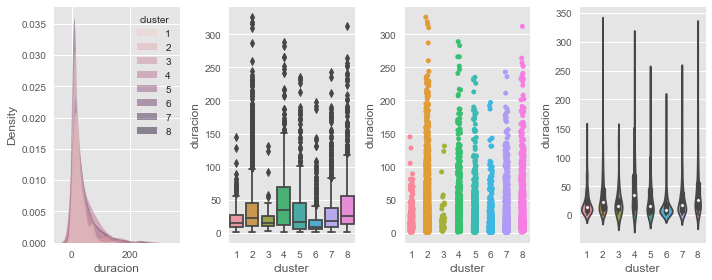

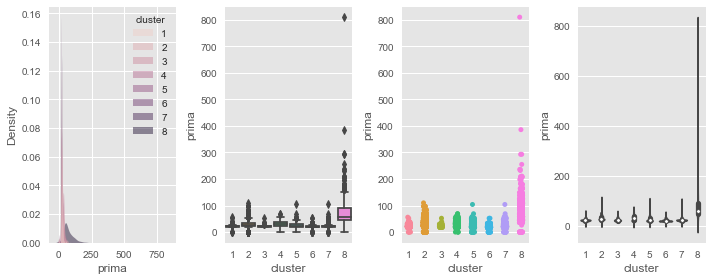

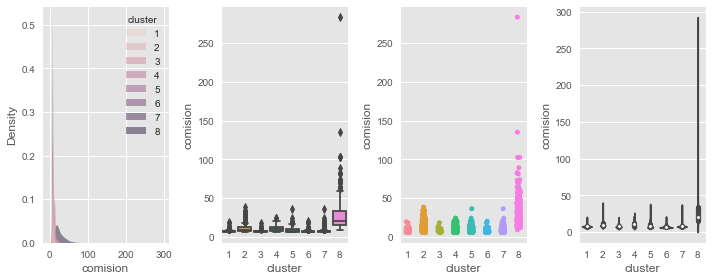

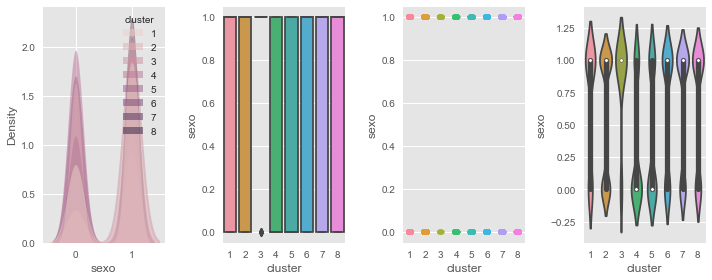

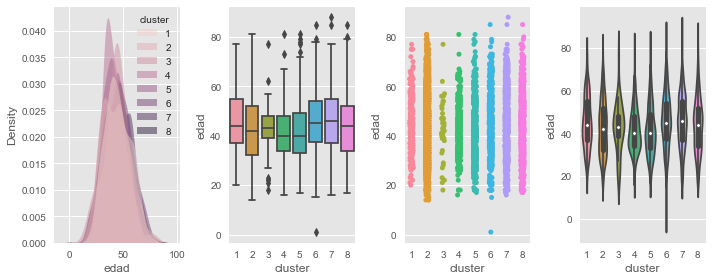

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



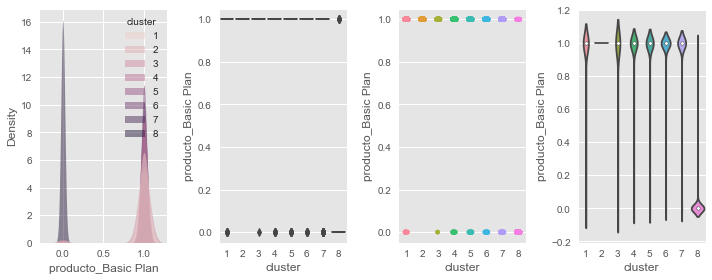

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



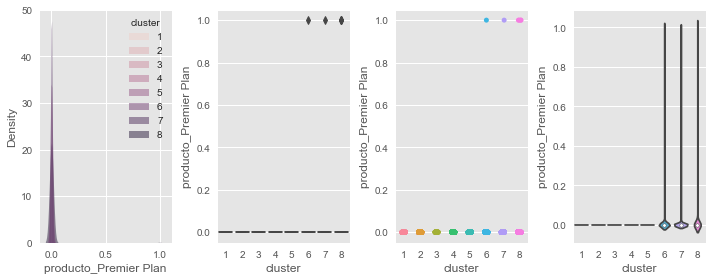

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



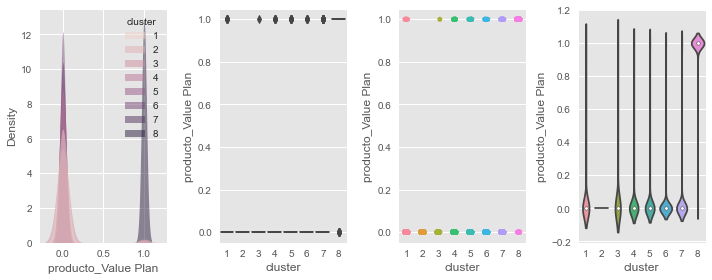

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



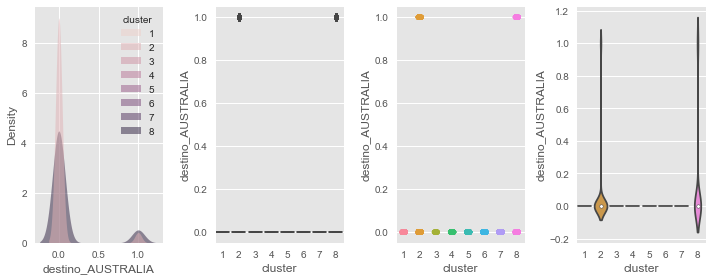

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



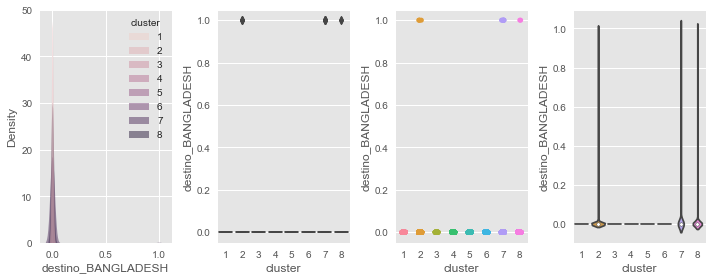

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



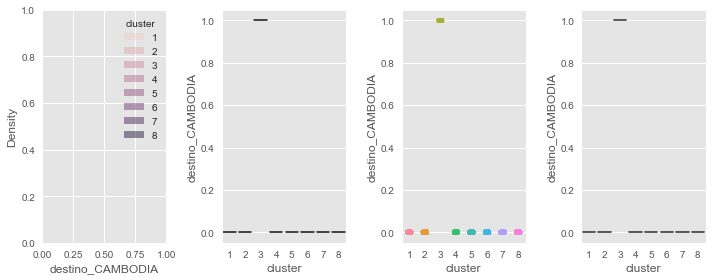

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



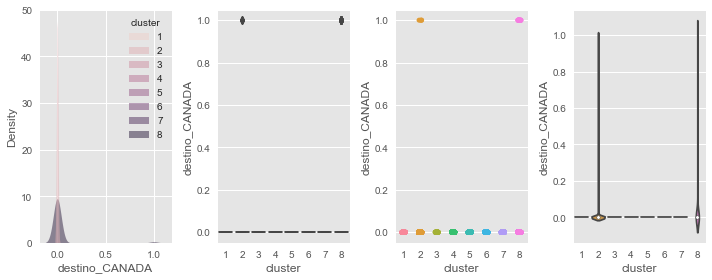

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



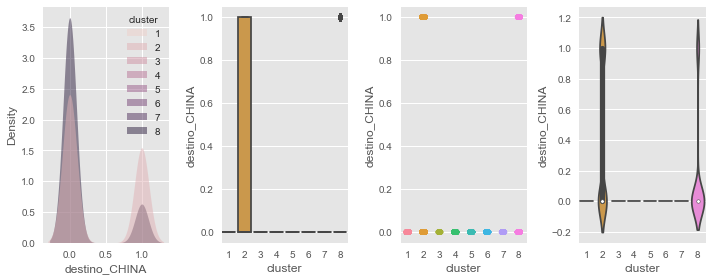

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



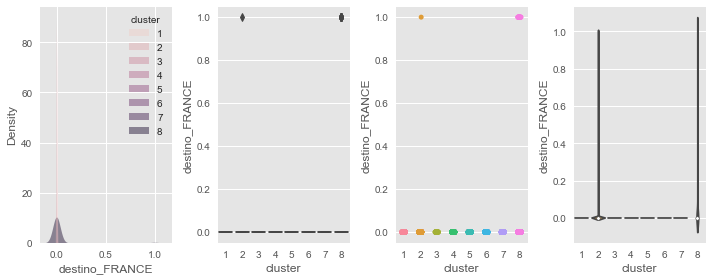

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



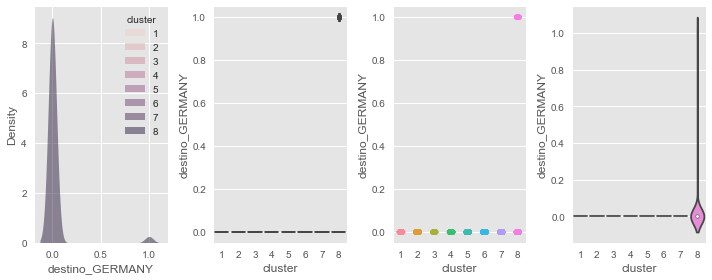

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



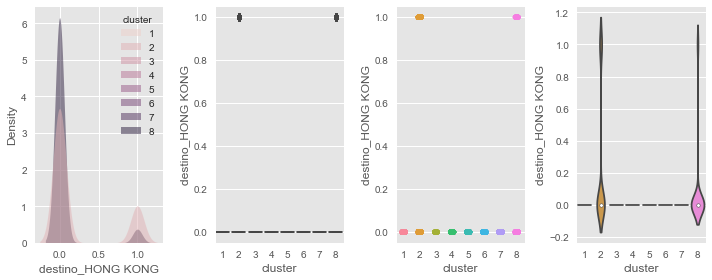

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



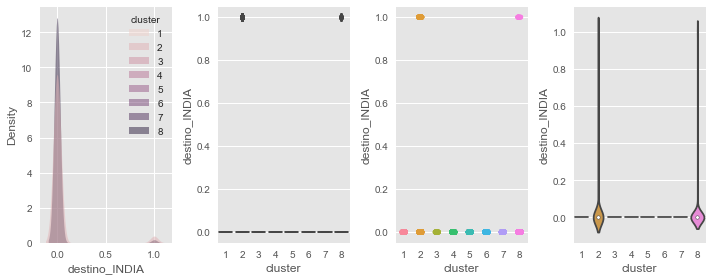

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



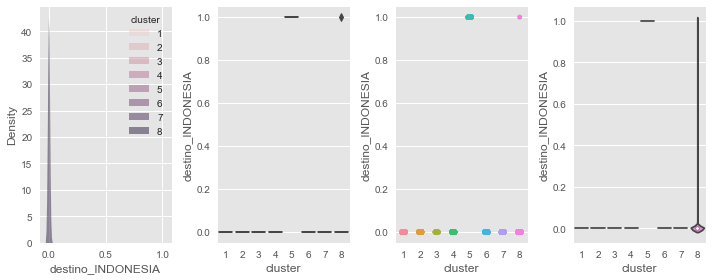

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



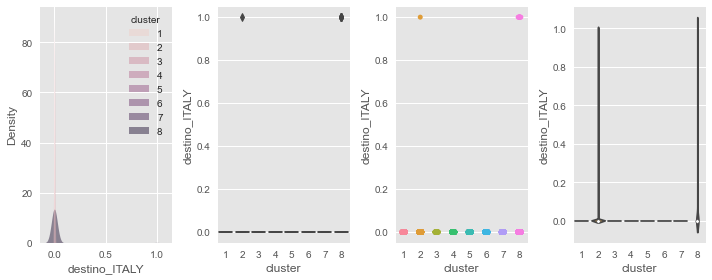

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



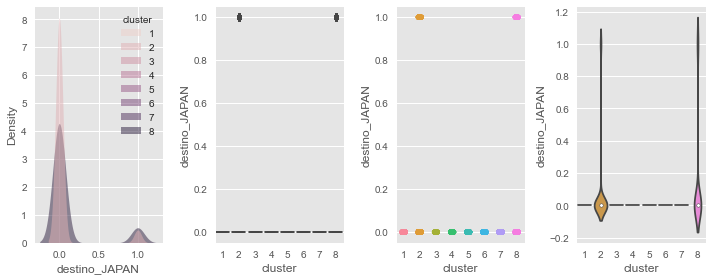

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



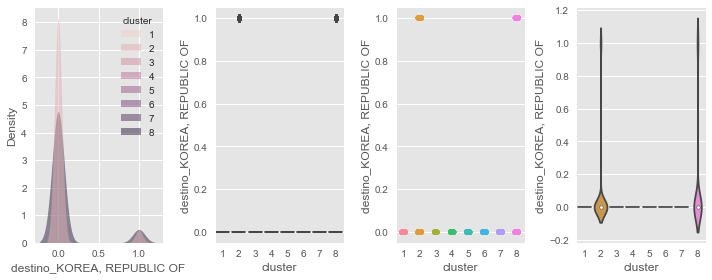

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



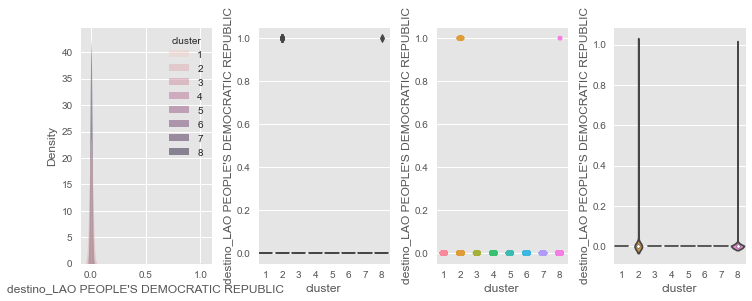

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



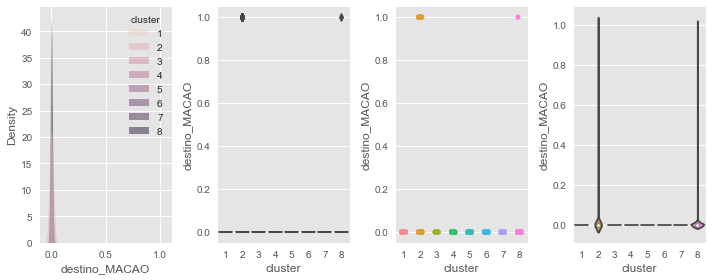

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



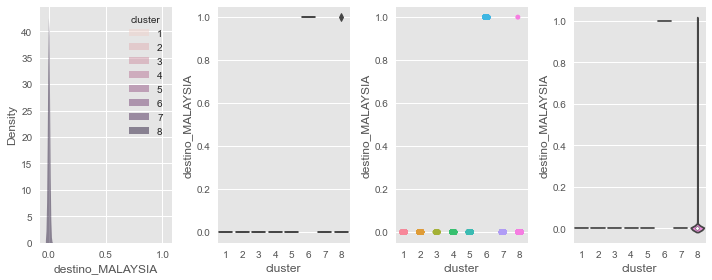

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



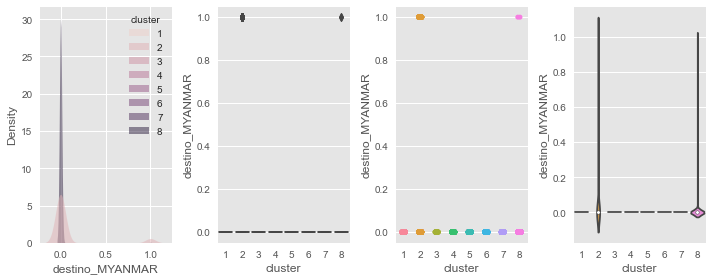

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



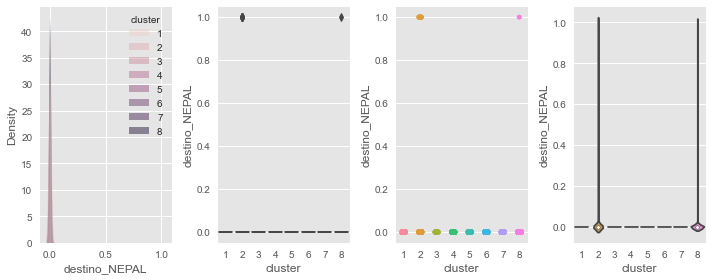

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



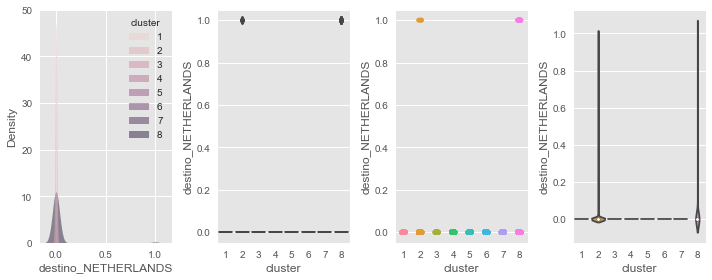

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



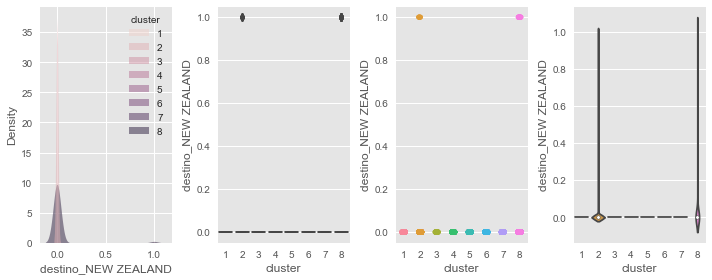

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



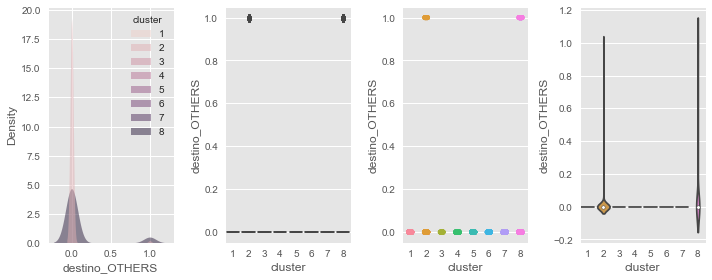

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



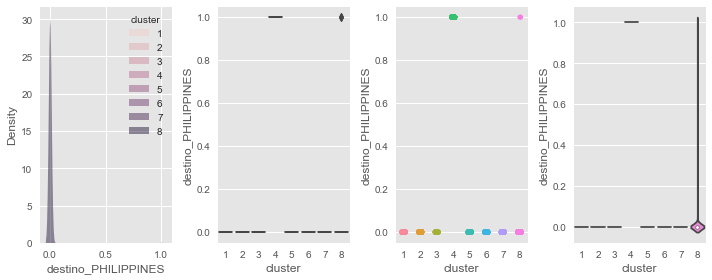

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



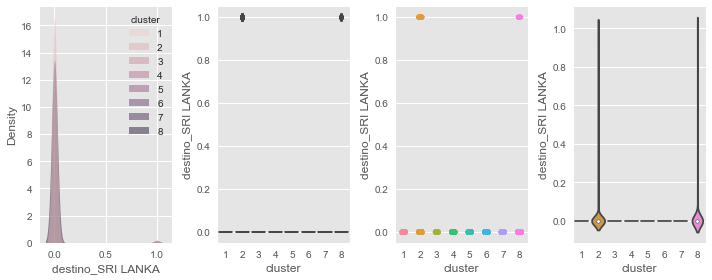

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



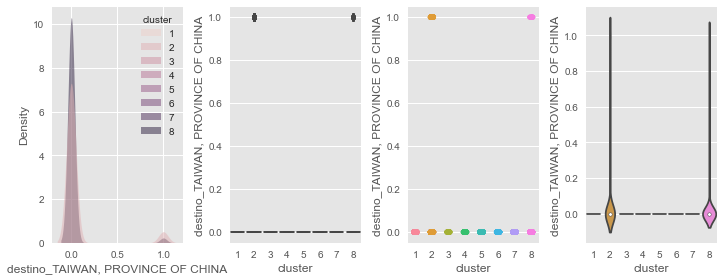

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



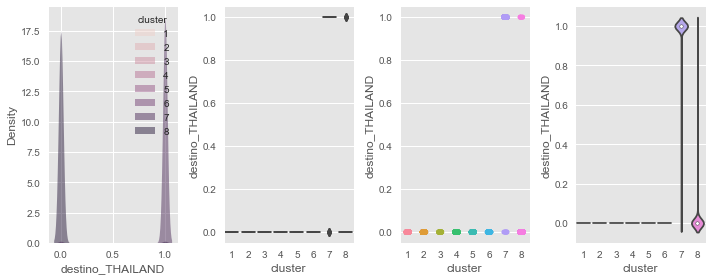

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



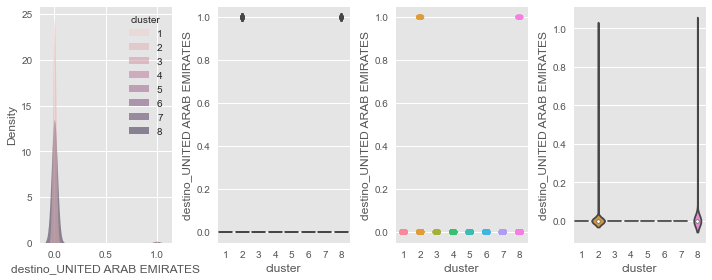

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



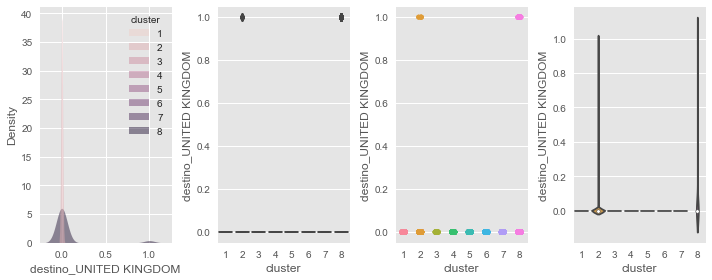

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



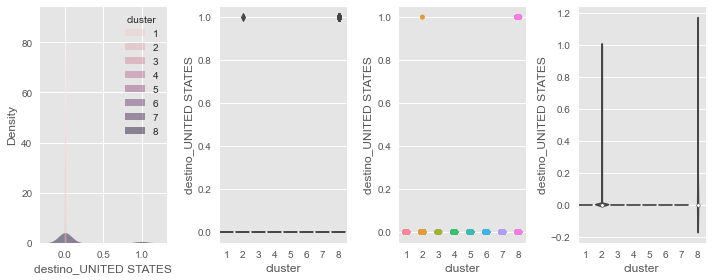

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



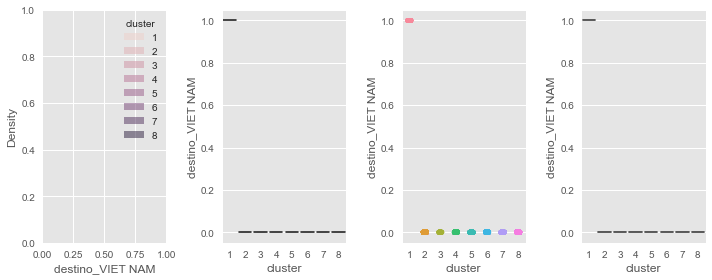

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



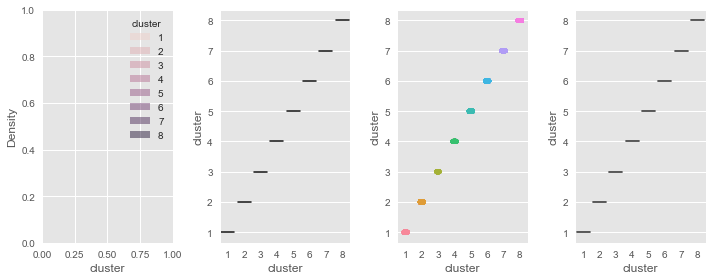

In [240]:
# Descripción de los clusters por las variables:
var_num = dataset_dummies_km.columns
respuesta = np.array(["cluster"])

df = dataset_dummies_km
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=df, x=i, hue=respuesta[0],
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=df, y=i, x=respuesta[0],ax=axs[1])
    sns.stripplot(y= i,data=df, x =respuesta[0],ax=axs[2])
    sns.violinplot(data=df, y=i, x=respuesta[0],ax=axs[3])
    fig.tight_layout()
    plt.show()

## K-means - dummies

In [324]:
dataset_dummies.head(8)

producto  duracion  destino  prima  comision  sexo  edad
5           2        66       14  121.0     42.35     0    44
10          1        33       13   26.0      9.10     0    18
11          1         1        3   18.0      6.30     1    47
18          1         3        3   18.0      6.30     1    47
109         1        45       10   26.0      9.10     1    31
110         1       181        4   30.0     10.50     0    48
111         1         5        4   22.0      7.70     0    29
112         1        22        1   18.0      6.30     1    66

In [325]:
data_dummies = dataset_dummies.copy()
data_dummies.shape

(6329, 7)

In [326]:
data_dummies

producto  duracion  destino  prima  comision  sexo  edad
5             2        66       14  121.0     42.35     0    44
10            1        33       13   26.0      9.10     0    18
11            1         1        3   18.0      6.30     1    47
18            1         3        3   18.0      6.30     1    47
109           1        45       10   26.0      9.10     1    31
...         ...       ...      ...    ...       ...   ...   ...
63321         1       111        7   35.0     12.25     1    31
63322         1        58        0   40.0     14.00     0    40
63323         1         2        3   18.0      6.30     1    57
63324         1         3        6   18.0      6.30     1    63
63325         1        22        2   26.0      9.10     0    35

[6329 rows x 7 columns]

In [327]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing
#data_escalada = preprocessing.Normalizer().fit_transform(data_dummies)
data_escalada = StandardScaler().fit_transform(data_dummies)
data_escalada

array([[ 2.49171511,  0.80084009,  1.76504984, ...,  3.36386602,
        -1.18864882,  0.03755653],
       [-0.39498907, -0.02917782,  1.57309506, ..., -0.29330743,
        -1.18864882, -2.0362948 ],
       [-0.39498907, -0.83404367, -0.34645275, ..., -0.60127994,
         0.84129138,  0.27684707],
       ...,
       [-0.39498907, -0.80889161, -0.34645275, ..., -0.60127994,
         0.84129138,  1.07448219],
       [-0.39498907, -0.78373956,  0.22941159, ..., -0.60127994,
         0.84129138,  1.55306327],
       [-0.39498907, -0.30585046, -0.53840753, ..., -0.29330743,
        -1.18864882, -0.68031509]])

In [328]:
#Se determina las variables a evaluar
X = data_escalada.copy()

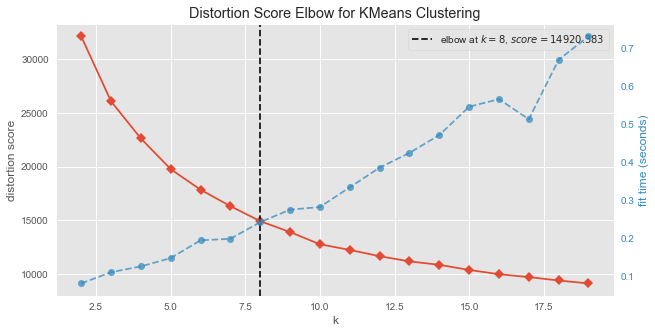

Nº de custlers optimo:  8


In [329]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)
print("Nº de custlers optimo: ", elbow.elbow_value_)

In [330]:
#ejecutar el algoritmo k-means
kmeans = KMeans(n_clusters=elbow.elbow_value_, init = 'k-means++', 
                   max_iter = 300, n_init = 10).fit(X)

In [331]:
#Se obtiene los datos de los centroides
centroides = kmeans.cluster_centers_
#centroides

In [332]:
#se obtienen las etiquetas del cluster
etiquetas = kmeans.labels_
etiquetas

array([5, 3, 0, ..., 2, 2, 3])

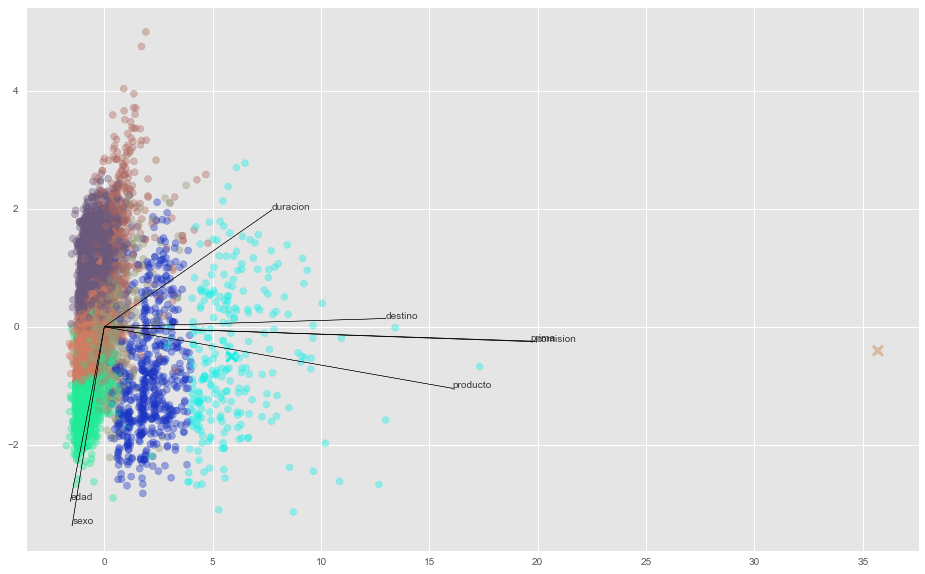

In [333]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
#colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
import random
number_of_colors = elbow.elbow_value_
lista_colores = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


#Se asignan los colores a cada clústeres
colores_cluster = [lista_colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = lista_colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data_dummies.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()
# PCA1, en el eje horizontal, los puntos que están mas asociados a este eje son los del PCA1.
# PCA2, en el eje vertical, los puntos que están más asociados a este eje son los del PCA2.

In [334]:
#añadir el cluster a un nuevo df
dataset_dummies_km_d = dataset_dummies.copy()
clusters_kmeans = kmeans.labels_
dataset_dummies_km_d["cluster"] = clusters_kmeans
dataset_dummies_km_d["cluster"] = dataset_dummies_km_d["cluster"] + 1
dataset_dummies_km_d.head(8)

producto  duracion  destino  prima  comision  sexo  edad  cluster
5           2        66       14  121.0     42.35     0    44        6
10          1        33       13   26.0      9.10     0    18        4
11          1         1        3   18.0      6.30     1    47        1
18          1         3        3   18.0      6.30     1    47        1
109         1        45       10   26.0      9.10     1    31        7
110         1       181        4   30.0     10.50     0    48        5
111         1         5        4   22.0      7.70     0    29        4
112         1        22        1   18.0      6.30     1    66        3

In [335]:
# valores de la variable "cluster"
print('Tabla de frecuencias absolutas:')
print(dataset_dummies_km_d['cluster'].value_counts())

Tabla de frecuencias absolutas:
4    1823
1    1524
3    1269
2     589
7     436
5     430
6     257
8       1
Name: cluster, dtype: int64


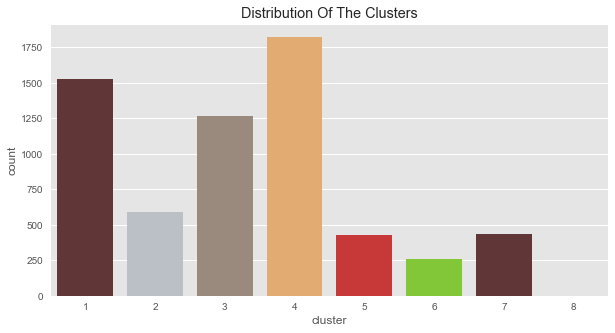

In [336]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#DF2020', '#81DF20']
pl = sns.countplot(x=dataset_dummies_km_d["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [337]:
# CALCULAR LOS ESTADISTICOS PRINCIPALES AGRUPADOS POR EL CLUSTER

# copiar el dataframe
data_ = dataset_dummies_km_d.copy()
# variable respuesta, es el cluster 
respuesta = np.array(["cluster"])

# Medidas de centralidad: Media, mediana, máximo y mínimo
#Calcular la media
media = data_.groupby(respuesta[0]).mean()
#convertir las columnas en filas
media = media.unstack()
#Calcular la mediana
mediana = data_.groupby(respuesta[0]).median()
#convertir las columnas en filas
mediana = mediana.unstack()
#Calcular el máximo
maximo = data_.groupby(respuesta[0]).max()
#convertir las columnas en filas
maximo = maximo.unstack()
#Calcular el minimo
minimo = data_.groupby(respuesta[0]).min()
#convertir las columnas en filas
minimo = minimo.unstack()

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
#Calcular la desviación estandar
desv = data_.groupby(respuesta[0]).std()
#convertir las columnas en filas
desv = desv.unstack()
#Calcular el cuartil 1
q1 = data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
q1 = q1.unstack()
#Calcular el cuartil 3
q3 = data_.groupby(respuesta[0]).quantile(0.75)
#convertir las columnas en filas
q3 = q3.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()

# Error estándar y intervalos de confianza de la media al 95% y 99%
#Calcular el número de repeticiones
contador = data_.groupby(respuesta[0]).count()
#convertir las columnas en filas
contador = contador.unstack()
#Calcular el error estandar
error_std = data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
error_std = error_std.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()
#Calcular el intervalor de confianza más bajo
ic_lower = data_.groupby(respuesta[0]).mean() - 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_lower = ic_lower.unstack()
#Calcular el intervalor de confianza más alto
ic_upper = data_.groupby(respuesta[0]).mean() + 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_upper = ic_upper.unstack()

#añadir al dataframe
est_des = pd.DataFrame({'Media': media, 'Mediana': mediana, 
                        'Max': maximo, 'Min': minimo,
                        'Desv.Est': desv, 'Q1': q1, 
                        'Q3': q3, 'IQR': iqr,
                        'N': contador, 'E_Std': error_std,
                        'RICL_95%': ic_lower, 'RICU_95%': ic_upper
                       })
#mostrar el df
est_des

Media  Mediana     Max     Min   Desv.Est      Q1  \
         cluster                                                           
producto 1          1.000000     1.00    1.00    1.00   0.000000    1.00   
         2          2.003396     2.00    3.00    2.00   0.058222    2.00   
         3          1.000788     1.00    2.00    1.00   0.028072    1.00   
         4          1.000000     1.00    1.00    1.00   0.000000    1.00   
         5          1.039535     1.00    2.00    1.00   0.195091    1.00   
         6          1.984436     2.00    3.00    1.00   0.215944    2.00   
         7          1.006881     1.00    2.00    1.00   0.082759    1.00   
         8          2.000000     2.00    2.00    2.00        NaN    2.00   
duracion 1         21.730971    14.00   97.00    1.00  19.919927    7.00   
         2         25.792869    17.00  129.00    1.00  24.934565    9.00   
         3         22.097715    14.00  112.00    1.00  21.094871    7.00   
         4         27.536478    22.00   92.00    1.00  21.927824    9.00   
         5        139.686047   124.50  326.00   74.00  48.222934  103.00   
         6         66.750973    49.00  312.00    6.00  52.377986   30.00   
         7         28.185780    19.50  123.00    1.00  24.680671   10.00   
         8        139.000000   139.00  139.00  139.00        NaN  139.00   
destino  1          2.422572     2.00   10.00    0.00   2.408655    0.00   
         2          7.202037     7.00   26.00    0.00   5.700125    2.00   
         3          2.430260     2.00   11.00    0.00   2.377119    1.00   
         4          3.718047     3.00   13.00    0.00   3.080789    1.00   
         5          4.993023     5.00   28.00    0.00   4.039138    2.00   
         6         15.836576    14.00   27.00    0.00   4.959656   14.00   
         7         14.639908    12.00   28.00    8.00   5.069282   11.00   
         8         14.000000    14.00   14.00   14.00        NaN   14.00   
prima    1         25.020997    22.00   83.00    0.00   8.980877   22.00   
         2         49.775891    45.00   92.00    0.00  17.082952   45.00   
         3         24.460993    22.00   97.00    0.00   8.182333   18.00   
         4         26.320900    22.00   69.00    0.00   9.175125   22.00   
         5         35.711628    35.00  104.00    0.00  14.952157   26.00   
         6        122.147860   109.00  386.00    0.00  41.807893   96.00   
         7         31.155963    26.00   87.00    0.00  12.907219   22.00   
         8        810.000000   810.00  810.00  810.00        NaN  810.00   
comision 1          8.945210     7.70   29.05    6.30   2.953498    7.70   
         2         18.499491    15.75   59.15    9.10   5.889339   15.75   
         3          8.728487     7.70   33.95    6.30   2.677657    7.70   
         4          9.380691     7.70   24.15    6.30   3.038903    7.70   
         5         12.827907    12.25   36.40    6.30   4.935642    9.10   
         6         43.150778    38.15  135.10   23.45  14.858886   33.60   
         7         11.183142     9.10   30.45    6.30   4.302214    7.70   
         8        283.500000   283.50  283.50  283.50        NaN  283.50   
sexo     1          1.000000     1.00    1.00    1.00   0.000000    1.00   
         2          0.689304     1.00    1.00    0.00   0.463172    0.00   
         3          0.906225     1.00    1.00    0.00   0.291630    1.00   
         4          0.000000     0.00    0.00    0.00   0.000000    0.00   
         5          0.332558     0.00    1.00    0.00   0.471679    0.00   
         6          0.595331     1.00    1.00    0.00   0.491786    0.00   
         7          0.756881     1.00    1.00    0.00   0.429459    1.00   
         8          0.000000     0.00    0.00    0.00        NaN    0.00   
edad     1         37.988189    39.00   48.00   14.00   7.340950   33.00   
         2         43.356537    44.00   79.00    1.00  12.558376   34.00   
         3         58.897557    58.00   88.00   49.00   7.077237   53.0

In [338]:
#Calcular la media de cada cluster
# copiar el dataframe
data_dummies_mean = dataset_dummies_km_d.copy()
# variable respuesta, es el cluster 
respuesta = np.array(["cluster"])

#Calcular la media
media_dummies = data_dummies_mean.groupby(respuesta[0]).mean()
media_dummies

producto    duracion    destino       prima    comision      sexo  \
cluster                                                                      
1        1.000000   21.730971   2.422572   25.020997    8.945210  1.000000   
2        2.003396   25.792869   7.202037   49.775891   18.499491  0.689304   
3        1.000788   22.097715   2.430260   24.460993    8.728487  0.906225   
4        1.000000   27.536478   3.718047   26.320900    9.380691  0.000000   
5        1.039535  139.686047   4.993023   35.711628   12.827907  0.332558   
6        1.984436   66.750973  15.836576  122.147860   43.150778  0.595331   
7        1.006881   28.185780  14.639908   31.155963   11.183142  0.756881   
8        2.000000  139.000000  14.000000  810.000000  283.500000  0.000000   

              edad  
cluster             
1        37.988189  
2        43.356537  
3        58.897557  
4        38.059792  
5        40.483721  
6        44.019455  
7        44.041284  
8        18.000000

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



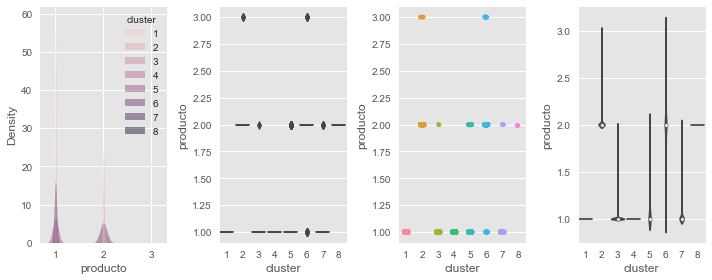

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



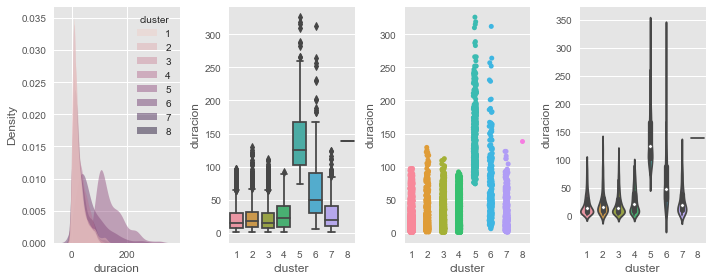

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



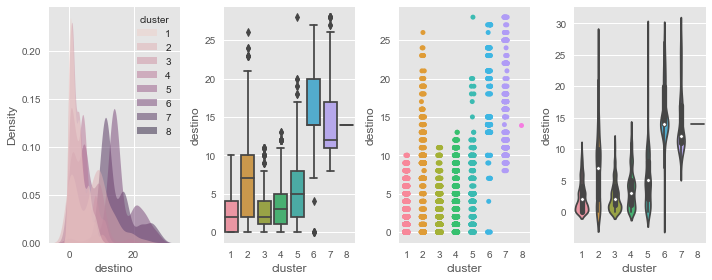

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



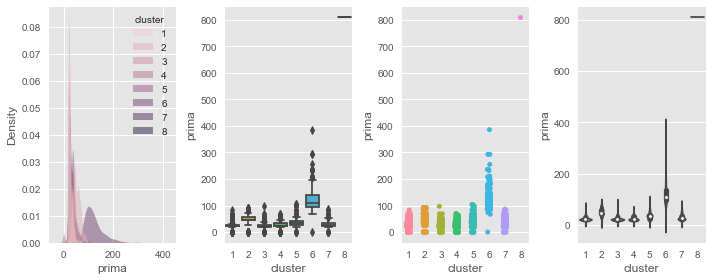

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



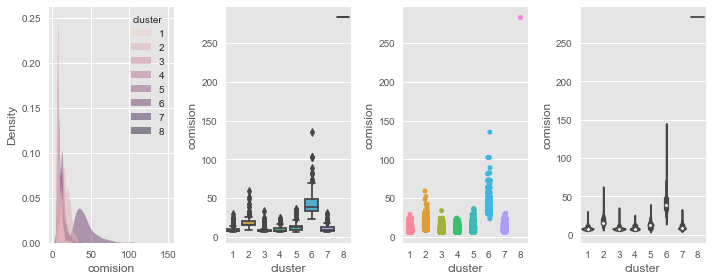

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



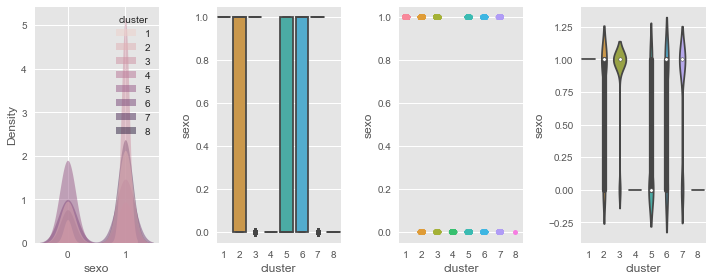

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



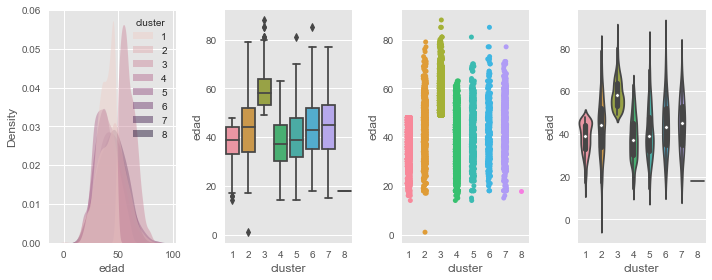

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



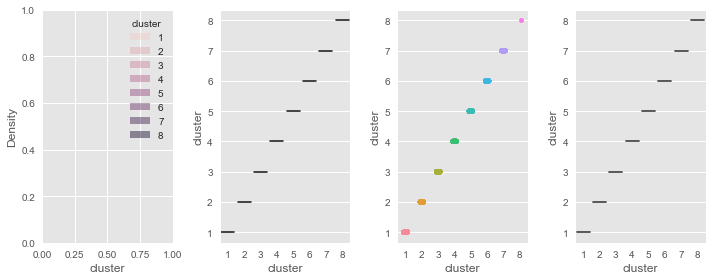

In [339]:
# Descripción de los clusters por las variables:
var_num = dataset_dummies_km_d.columns
respuesta = np.array(["cluster"])

df = dataset_dummies_km_d
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=df, x=i, hue=respuesta[0],
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=df, y=i, x=respuesta[0],ax=axs[1])
    sns.stripplot(y= i,data=df, x =respuesta[0],ax=axs[2])
    sns.violinplot(data=df, y=i, x=respuesta[0],ax=axs[3])
    fig.tight_layout()
    plt.show()

## GMM - dummies

In [257]:
data_gmm = dataset_dummies.copy()
data_gmm.shape, data_gmm.head(8)

((6329, 7),
      producto  duracion  destino  prima  comision  sexo  edad
 5           2        66       14  121.0     42.35     0    44
 10          1        33       13   26.0      9.10     0    18
 11          1         1        3   18.0      6.30     1    47
 18          1         3        3   18.0      6.30     1    47
 109         1        45       10   26.0      9.10     1    31
 110         1       181        4   30.0     10.50     0    48
 111         1         5        4   22.0      7.70     0    29
 112         1        22        1   18.0      6.30     1    66)

In [258]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing
#data_escalada = preprocessing.Normalizer().fit_transform(data_dummies)
data_escalada = StandardScaler().fit_transform(data_gmm)
data_escalada

array([[ 2.49171511,  0.80084009,  1.76504984, ...,  3.36386602,
        -1.18864882,  0.03755653],
       [-0.39498907, -0.02917782,  1.57309506, ..., -0.29330743,
        -1.18864882, -2.0362948 ],
       [-0.39498907, -0.83404367, -0.34645275, ..., -0.60127994,
         0.84129138,  0.27684707],
       ...,
       [-0.39498907, -0.80889161, -0.34645275, ..., -0.60127994,
         0.84129138,  1.07448219],
       [-0.39498907, -0.78373956,  0.22941159, ..., -0.60127994,
         0.84129138,  1.55306327],
       [-0.39498907, -0.30585046, -0.53840753, ..., -0.29330743,
        -1.18864882, -0.68031509]])

In [259]:
#Se determina las variables a evaluar
X = data_escalada.copy()

Wall time: 1min 57s


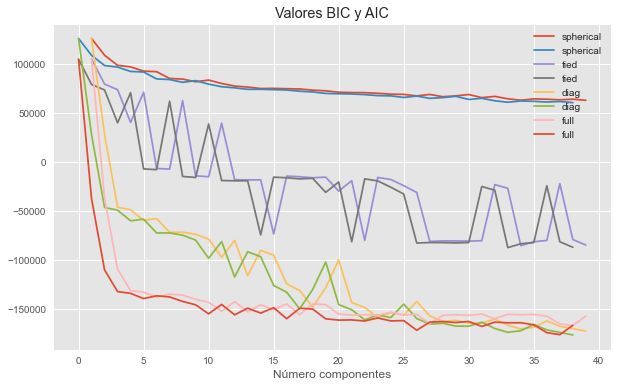

In [261]:
%%time
# Tunning del modelo GMM
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    valores_aic = []
    
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(X)
        valores_bic.append(modelo.bic(X))
        valores_aic.append(modelo.aic(X))
              
    ax.plot(n_components, valores_bic, valores_aic, label=covariance_type)
        
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend(loc='upper right', title='Metricas');

In [262]:
#la mejor matriz de covarianza es para el modelo full", es el valor más bajo
#el mejor número de componentes es entre 4 y 5
mat_cov = 'full'
k = 5

In [263]:
# Entrenamiento del modelo GMM
# ==============================================================================
modelo_gmm = GaussianMixture(
                n_components    = k,
                covariance_type = mat_cov,
                random_state    = 123, 
             )

modelo_gmm.fit(X=X)

GaussianMixture(n_components=5, random_state=123)

In [264]:
centers = modelo_gmm.means_

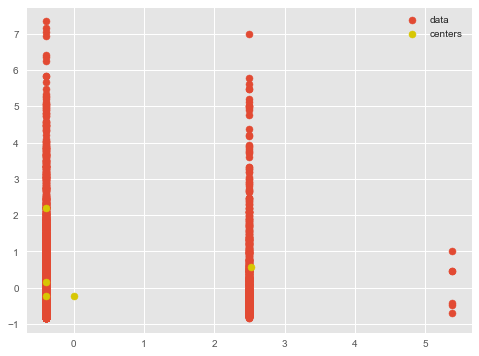

In [266]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='y', label="centers")
plt.legend()
plt.show() 

In [278]:
pred = modelo_gmm.predict(X)
data_gmm["cluster"] = pred + 1
data_gmm.head(8)

producto  duracion  destino  prima  comision  sexo  edad  cluster
5           2        66       14  121.0     42.35     0    44        4
10          1        33       13   26.0      9.10     0    18        2
11          1         1        3   18.0      6.30     1    47        5
18          1         3        3   18.0      6.30     1    47        5
109         1        45       10   26.0      9.10     1    31        5
110         1       181        4   30.0     10.50     0    48        2
111         1         5        4   22.0      7.70     0    29        2
112         1        22        1   18.0      6.30     1    66        5

In [279]:
data_gmm['cluster'].value_counts()

5    3482
2    2282
4     375
3     110
1      80
Name: cluster, dtype: int64

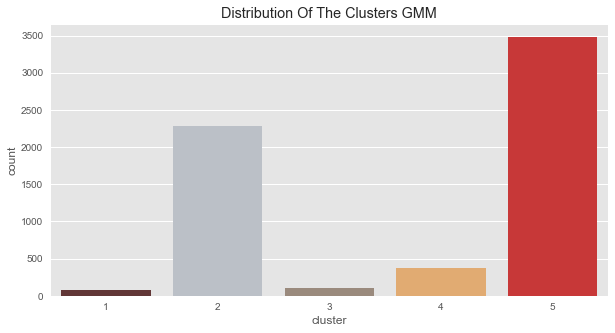

In [281]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#DF2020', '#81DF20']
pl = sns.countplot(x=data_gmm["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters GMM")
plt.show()

In [282]:
# CALCULAR LOS ESTADISTICOS PRINCIPALES AGRUPADOS POR EL CLUSTER

# copiar el dataframe
data_ = data_gmm.copy()
# variable respuesta, es el cluster 
respuesta = np.array(["cluster"])

# Medidas de centralidad: Media, mediana, máximo y mínimo
#Calcular la media
media = data_.groupby(respuesta[0]).mean()
#convertir las columnas en filas
media = media.unstack()
#Calcular la mediana
mediana = data_.groupby(respuesta[0]).median()
#convertir las columnas en filas
mediana = mediana.unstack()
#Calcular el máximo
maximo = data_.groupby(respuesta[0]).max()
#convertir las columnas en filas
maximo = maximo.unstack()
#Calcular el minimo
minimo = data_.groupby(respuesta[0]).min()
#convertir las columnas en filas
minimo = minimo.unstack()

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
#Calcular la desviación estandar
desv = data_.groupby(respuesta[0]).std()
#convertir las columnas en filas
desv = desv.unstack()
#Calcular el cuartil 1
q1 = data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
q1 = q1.unstack()
#Calcular el cuartil 3
q3 = data_.groupby(respuesta[0]).quantile(0.75)
#convertir las columnas en filas
q3 = q3.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()

# Error estándar y intervalos de confianza de la media al 95% y 99%
#Calcular el número de repeticiones
contador = data_.groupby(respuesta[0]).count()
#convertir las columnas en filas
contador = contador.unstack()
#Calcular el error estandar
error_std = data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
error_std = error_std.unstack()
#Calcular el rango intercuatilico
iqr = data_.groupby(respuesta[0]).quantile(0.75) - data_.groupby(respuesta[0]).quantile(0.25)
#convertir las columnas en filas
iqr = iqr.unstack()
#Calcular el intervalor de confianza más bajo
ic_lower = data_.groupby(respuesta[0]).mean() - 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_lower = ic_lower.unstack()
#Calcular el intervalor de confianza más alto
ic_upper = data_.groupby(respuesta[0]).mean() + 1.96 * data_.groupby(respuesta[0]).std()/np.sqrt(data_.groupby(respuesta[0]).count())
#convertir las columnas en filas
ic_upper = ic_upper.unstack()

#añadir al dataframe
est_des = pd.DataFrame({'Media': media, 'Mediana': mediana, 
                        'Max': maximo, 'Min': minimo,
                        'Desv.Est': desv, 'Q1': q1, 
                        'Q3': q3, 'IQR': iqr,
                        'N': contador, 'E_Std': error_std,
                        'RICL_95%': ic_lower, 'RICU_95%': ic_upper
                       })
#mostrar el df
est_des

Media  Mediana     Max   Min   Desv.Est     Q1  \
         cluster                                                        
producto 1          1.000000     1.00    1.00   1.0   0.000000   1.00   
         2          1.000000     1.00    1.00   1.0   0.000000   1.00   
         3          1.000000     1.00    1.00   1.0   0.000000   1.00   
         4          2.010667     2.00    3.00   2.0   0.102864   2.00   
         5          1.139862     1.00    3.00   1.0   0.348546   1.00   
duracion 1         24.850000    10.00  192.00   1.0  33.757550   6.00   
         2         40.581507    26.00  326.00   1.0  43.871936  11.00   
         3        121.654545   144.50  310.00   1.0  75.980736  47.25   
         4         57.088000    37.00  312.00   1.0  57.727835  18.00   
         5         24.932223    16.00  164.00   1.0  25.205766   8.00   
destino  1         10.812500     6.50   28.00   0.0  10.215518   2.75   
         2          4.356266     4.00   28.00   0.0   4.087242   1.00   
         3          5.890909     4.00   28.00   0.0   6.593499   1.00   
         4         11.408000    13.00   28.00   0.0   6.527313   7.00   
         5          4.215393     2.00   28.00   0.0   4.903740   1.00   
prima    1          6.487500     0.00   31.00   0.0  10.352024   0.00   
         2         28.371604    26.00   87.00  18.0  10.182699  22.00   
         3         31.454545    22.00  179.00   0.0  38.362978   0.00   
         4         86.016000    67.00  810.00   0.0  67.540875  45.00   
         5         30.625215    26.00  121.00  18.0  16.480869  22.00   
comision 1          9.918125     7.70   24.15   6.3   4.463447   7.70   
         2          9.930061     9.10   30.45   6.3   3.563945   7.70   
         3         14.318182     9.10   62.65   6.3  11.416019   7.70   
         4         32.318533    24.15  283.50   9.1  22.638319  19.25   
         5         10.718825     9.10   42.35   6.3   5.768304   7.70   
sexo     1          0.950000     1.00    1.00   0.0   0.219320   1.00   
         2          0.000000     0.00    0.00   0.0   0.000000   0.00   
         3          0.609091     1.00    1.00   0.0   0.490187   0.00   
         4          0.216000     0.00    1.00   0.0   0.412064   0.00   
         5          1.000000     1.00    1.00   1.0   0.000000   1.00   
edad     1         45.825000    45.00   71.00  18.0  14.329553  35.00   
         2         40.280018    39.00   81.00  14.0  12.182632  31.00   
         3         39.881818    39.00   78.00  18.0  12.679342  30.00   
         4         41.341333    41.00   85.00   1.0  13.675216  30.50   
         5         45.956634    46.00   88.00  14.0  12.035861  37.00   

                        Q3       IQR     N     E_Std    RICL_95%    RICU_95%  
         cluster                                                              
producto 1          1.0000    0.0000    80  0.000000    1.000000    1.000000  
         2          1.0000    0.0000  2282  0.000000    1.000000    1.000000  
         3          1.0000    0.0000   110  0.000000    1.000000    1.000000  
         4          2.0000    0.0000   375  0.005312    2.000255    2.021078  
         5          1.0000    0.0000  3482  0.005907    1.128285    1.151439  
duracion 1         29.0000   23.0000    80  3.774209   17.452551   32.247449  
         2         55.0000   44.0000  2282  0.918394   38.781455   42.381559  
         3        173.7500  126.5000   110  7.244479  107.455367  135.853724  
         4         75.0000   57.0000   375  2.981053   51.245137   62.930863  
         5         33.0000   25.0000  3482  0.427155   24.094999   25.769447  
destino  1         25.0000   22.2500    80  1.142130    8.573926   13.051074  
         2          6.0000    5.0000  2282  0.085560    4.188568    4.523965  
         3          9.0000    8.0000   110  0.628665    4.658725    7.123093  
         4         14.0000    7.0000   375  0.337069   10.747345   12.068655  
         5          6.0000    5.0000  3482  0.083102    4

In [283]:
#Calcular la media de cada cluster
# copiar el dataframe
data_gmm_mean = data_gmm.copy()
# variable respuesta, es el cluster 
respuesta = np.array(["cluster"])

#Calcular la media
media_gmm = data_gmm_mean.groupby(respuesta[0]).mean()
media_gmm

producto    duracion    destino      prima   comision      sexo  \
cluster                                                                    
1        1.000000   24.850000  10.812500   6.487500   9.918125  0.950000   
2        1.000000   40.581507   4.356266  28.371604   9.930061  0.000000   
3        1.000000  121.654545   5.890909  31.454545  14.318182  0.609091   
4        2.010667   57.088000  11.408000  86.016000  32.318533  0.216000   
5        1.139862   24.932223   4.215393  30.625215  10.718825  1.000000   

              edad  
cluster             
1        45.825000  
2        40.280018  
3        39.881818  
4        41.341333  
5        45.956634

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



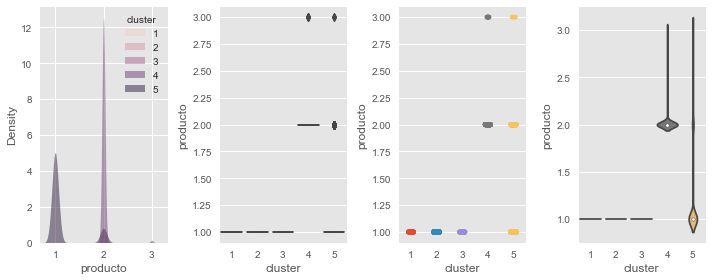

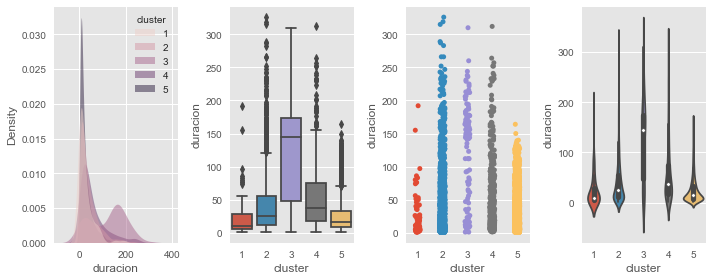

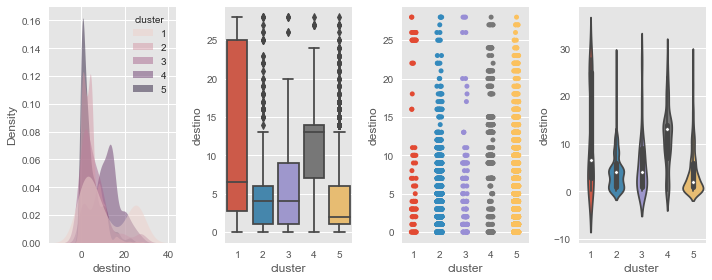

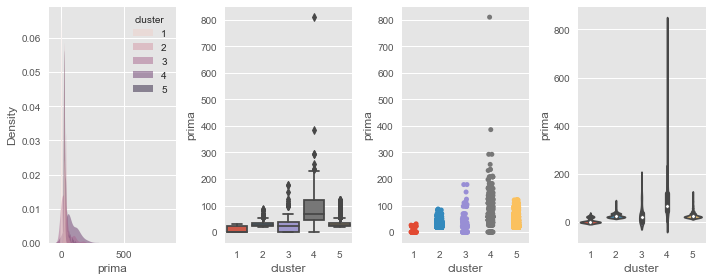

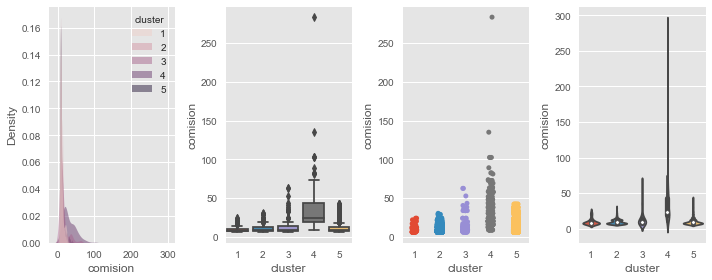

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



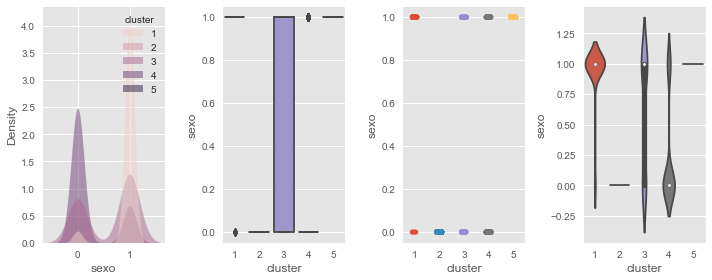

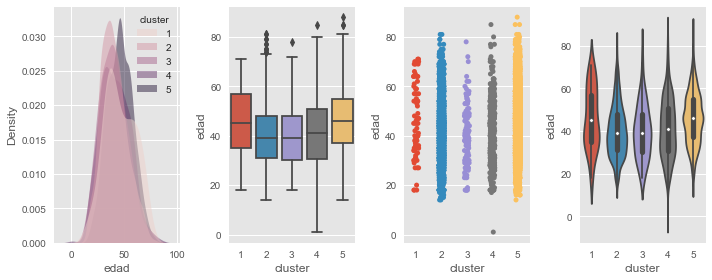

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



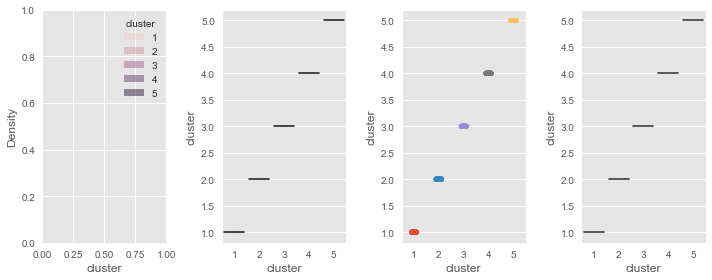

In [284]:
# Descripción de los clusters por las variables:
var_num = data_gmm.columns
respuesta = np.array(["cluster"])

df = data_gmm
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=df, x=i, hue=respuesta[0],
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=df, y=i, x=respuesta[0],ax=axs[1])
    sns.stripplot(y= i,data=df, x =respuesta[0],ax=axs[2])
    sns.violinplot(data=df, y=i, x=respuesta[0],ax=axs[3])
    fig.tight_layout()
    plt.show()

# Conclusiones

## K-means - dummies

In [344]:
# valores de la variable "cluster"
print('Tabla de frecuencias absolutas:')
print(dataset_dummies_km_d['cluster'].value_counts())

Tabla de frecuencias absolutas:
4    1823
1    1524
3    1269
2     589
7     436
5     430
6     257
8       1
Name: cluster, dtype: int64


In [343]:
media_dummies

producto    duracion    destino       prima    comision      sexo  \
cluster                                                                      
1        1.000000   21.730971   2.422572   25.020997    8.945210  1.000000   
2        2.003396   25.792869   7.202037   49.775891   18.499491  0.689304   
3        1.000788   22.097715   2.430260   24.460993    8.728487  0.906225   
4        1.000000   27.536478   3.718047   26.320900    9.380691  0.000000   
5        1.039535  139.686047   4.993023   35.711628   12.827907  0.332558   
6        1.984436   66.750973  15.836576  122.147860   43.150778  0.595331   
7        1.006881   28.185780  14.639908   31.155963   11.183142  0.756881   
8        2.000000  139.000000  14.000000  810.000000  283.500000  0.000000   

              edad  
cluster             
1        37.988189  
2        43.356537  
3        58.897557  
4        38.059792  
5        40.483721  
6        44.019455  
7        44.041284  
8        18.000000

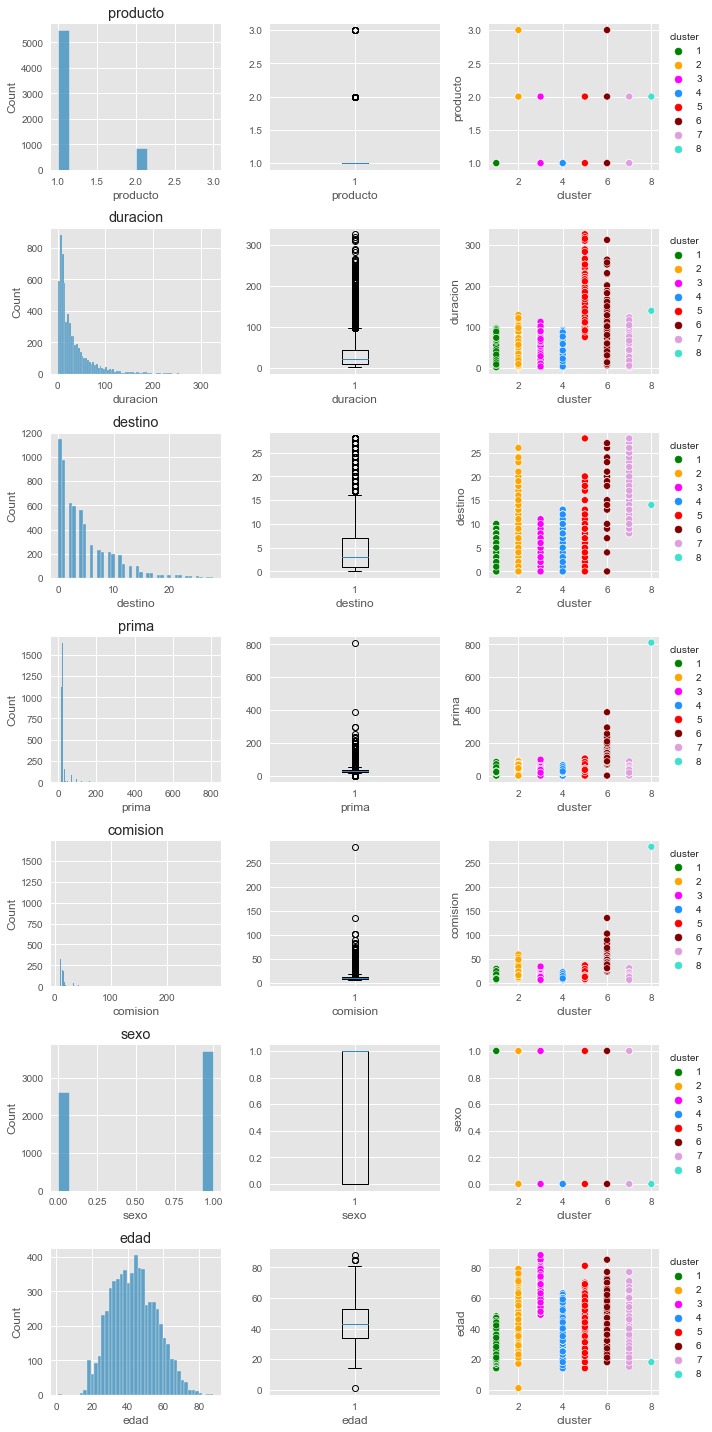

In [443]:
#  Numerical Data
variable_x = 'cluster'
var_n = ['producto', 'duracion', 'destino', 'prima', 'comision', 'sexo', 'edad']

#  plot Numerical Data
a = len(var_n)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,20))

for i in var_n:
    plt.subplot(a, b, c)
    #plt.title('{} (histograma), subplot: {},{},{}'.format(i, a, b, c))
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(dataset_dummies_km_d[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = dataset_dummies_km_d[i])
    c = c + 1
    plt.subplot(a, b, c)
    #plt.title('{} (scatterplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(variable_x)
    plt.ylabel(i)
    #plt.legend(loc='upper right')
    ax = sns.scatterplot(data = dataset_dummies_km_d, x = variable_x, y = i, hue = 'cluster',
                    palette=['green','orange','Fuchsia','dodgerblue','red', 'Maroon', 'plum', 'turquoise'])
    #la leyenda va fuera a la derecha
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    c = c + 1

plt.tight_layout()
plt.show()

Estas son las conclusiones:

- Cluster 2, está asociado al producto 2, son destinos más frecuentes y con una duración media de 25 días.
- Cluster 6, está asociado al producto 2, son destinos menos frecuentes y con una duración media de 66 días, además que la prima media es de 122 euros y lo comisión es la mayor de todas.

Hay que tener en cuenta que el producto 2 es mucho más caro que el producto 1.

El resto de Cluster están asociados al producto 1, sus características principales son:
- Cluster 5, son los viajes que tienen mayor duración y a los destinos más frecuentes.
- Cluster 7, son los destinos menos frecuentes y con una duración media de 28 días.
- Cluster 1, Cluster 3 y Cluster 4, donde aparece el mayor numero de clientes, estos son muy parecidos, las diferencias están en:
        - Cluster 1, son hombres y edad de 38 años.
        - Cluster 4, son mujeres y edad de 38 años.
        - Cluster 3, la edad media es de 58 años.  
        
A destacar que el Cluster 8 solo tiene una observación, por lo que no lo tenemos en cuenta.

## GMM - dummies

In [345]:
print('Tabla de frecuencias absolutas:')
data_gmm['cluster'].value_counts()

Tabla de frecuencias absolutas:


5    3482
2    2282
4     375
3     110
1      80
Name: cluster, dtype: int64

In [341]:
media_gmm

producto    duracion    destino      prima   comision      sexo  \
cluster                                                                    
1        1.000000   24.850000  10.812500   6.487500   9.918125  0.950000   
2        1.000000   40.581507   4.356266  28.371604   9.930061  0.000000   
3        1.000000  121.654545   5.890909  31.454545  14.318182  0.609091   
4        2.010667   57.088000  11.408000  86.016000  32.318533  0.216000   
5        1.139862   24.932223   4.215393  30.625215  10.718825  1.000000   

              edad  
cluster             
1        45.825000  
2        40.280018  
3        39.881818  
4        41.341333  
5        45.956634

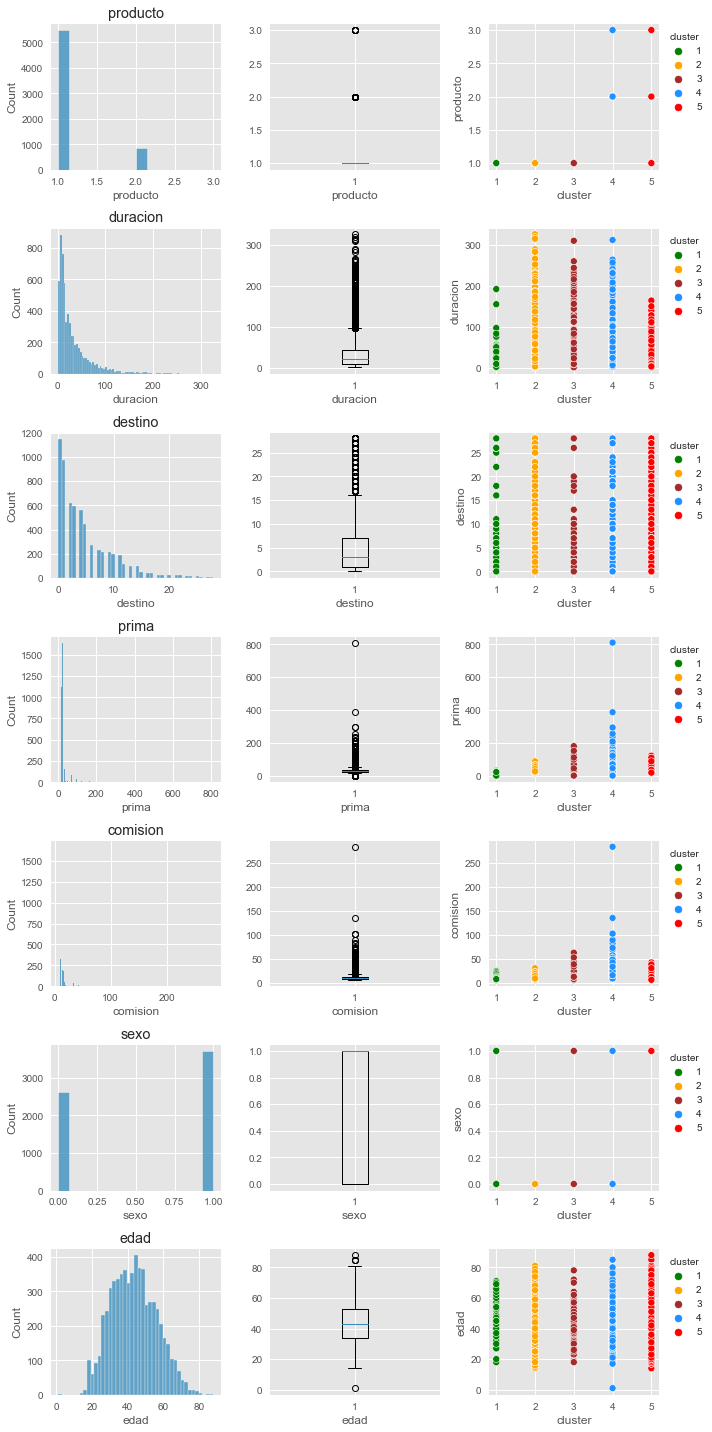

In [438]:
#  Numerical Data
variable_x = 'cluster'
var_n = ['producto', 'duracion', 'destino', 'prima', 'comision', 'sexo', 'edad']

#  plot Numerical Data
a = len(var_n)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,20))

for i in var_n:
    plt.subplot(a, b, c)
    #plt.title('{} (histograma), subplot: {},{},{}'.format(i, a, b, c))
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(data_gmm[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = data_gmm[i])
    c = c + 1
    plt.subplot(a, b, c)
    #plt.title('{} (scatterplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(variable_x)
    plt.ylabel(i)
    #plt.legend(loc='upper right')
    ax = sns.scatterplot(data = data_gmm, x = variable_x, y = i, hue = 'cluster',
                    palette=['green','orange','brown','dodgerblue','red'])
    #la leyenda va fuera a la derecha
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    c = c + 1

plt.tight_layout()
plt.show()

Estas son las conclusiones:

- Cluster 4, está asociado al producto 2, donde las primas son más altas (media de 86 euros), así como la comisión asociada.

- Cluster 1, está asociado al producto 1, la prima es muy baja (media de 6,48 euros).

- Cluster 1, es muy parecido al Cluster 5, pero se diferencian en:
    - Cluster 1, son destinos menos frecuentes, la prima es menor (la media son 6,48 euros), pero la comisión (la media es de casi 10 euros), está es muy similar al Cluster 5.
    - Cluster 5, son destinos más frecuentes, la prima es más alta (la media son 30 euros), pero la comisión es similar al Cluster 1.

- Cluster 2, es muy parecido al Cluster 3, pero se diferencian en:
    - Cluster 3, la duración media es de 121 días, frente a los 40 días del Cluster 2.
    - En ambos clusters la prima es muy parecida, en torno a los 30 euros, pero la comisión del Cluster 3 es superior, es de de 14 euros, frente a casi los 10 euros del Cluster 2
    - Además en el Cluster 2, predominan las mujeres.

# Pruebas

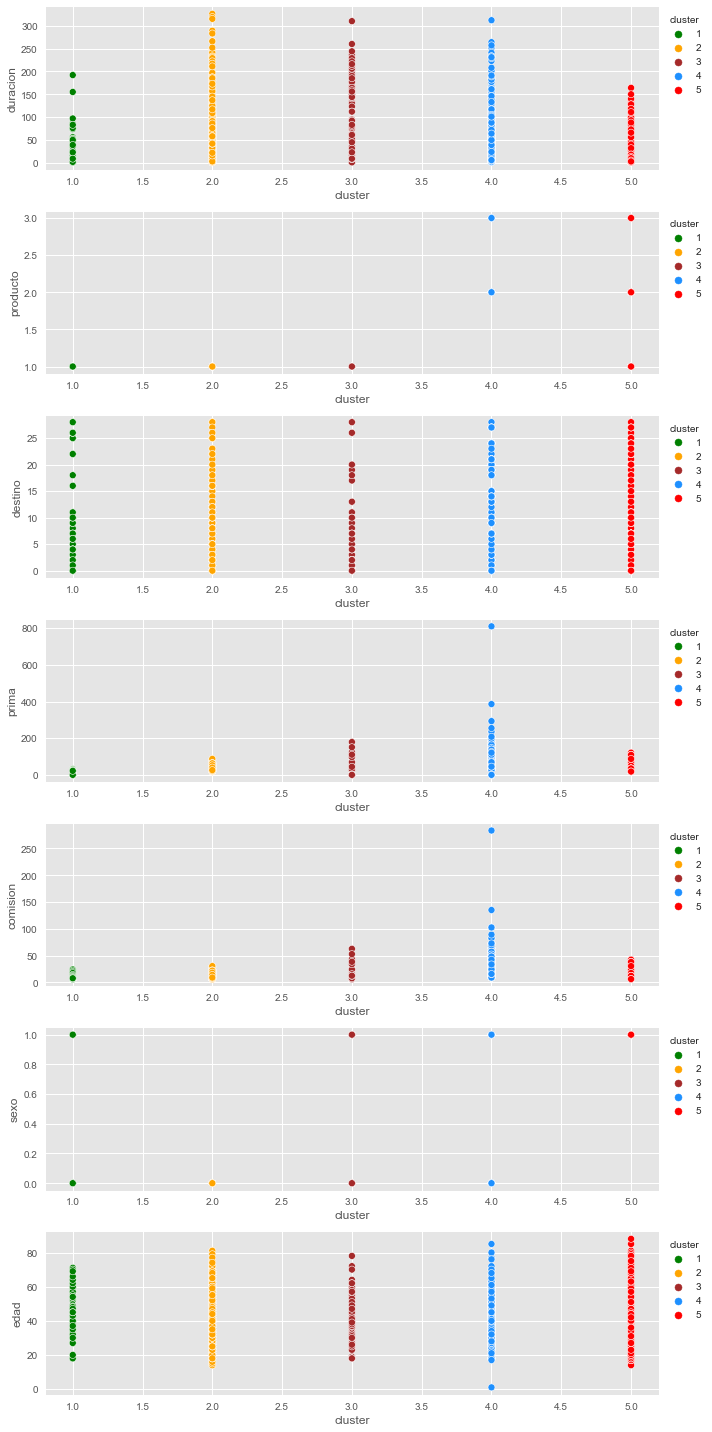

Wall time: 2.97 s


In [436]:
%%time
#  Numerical Data
variable_x = 'cluster'
var_n = ['duracion', 'producto', 'destino', 'prima', 'comision', 'sexo', 'edad']

#  plot Numerical Data
a = len(var_n)  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,20))

for i in var_n:
    plt.subplot(a, b, c)
    #plt.title('{} (scatterplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(variable_x)
    plt.ylabel(i)
    #plt.legend(loc='upper right')
    ax = sns.scatterplot(data = data_gmm, x = variable_x, y = i, hue = 'cluster',
                    palette=['green','orange','brown','dodgerblue','red'])
    #la leyenda va fuera a la derecha
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    c = c + 1

plt.tight_layout()
plt.show()

**************************************************
Graficos de la variable duracion
**************************************************


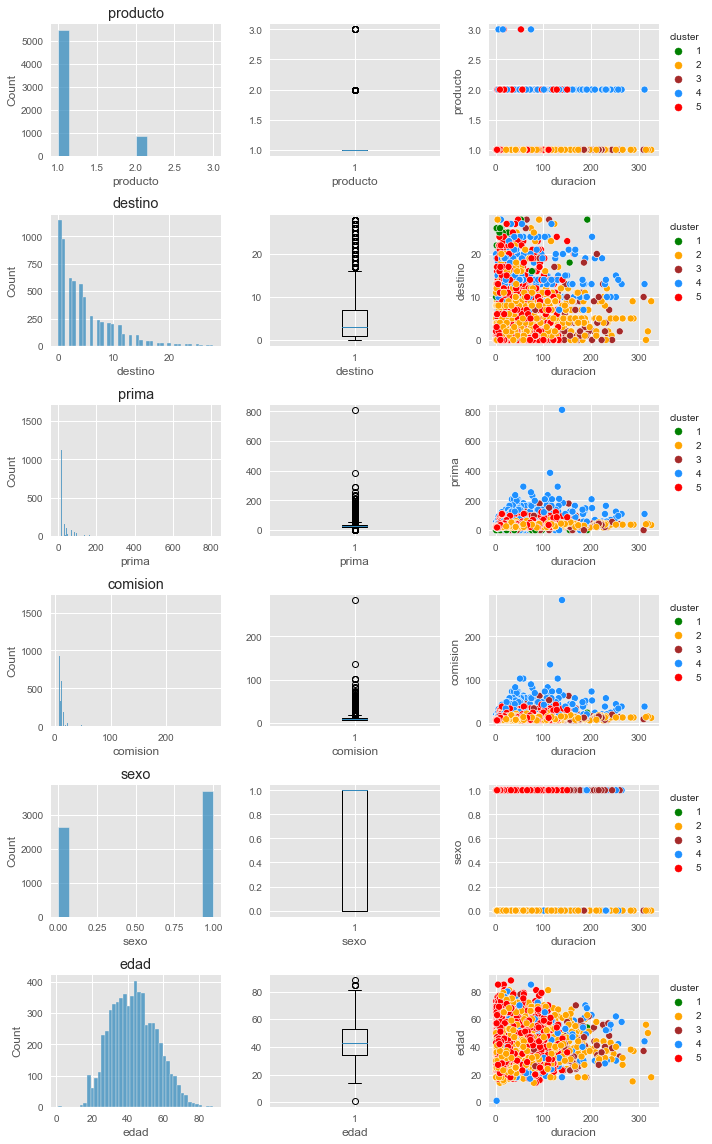

**************************************************
**************************************************
Wall time: 6.99 s


In [428]:
%%time
#  Numerical Data
variable_x = 'duracion'
var_n = ['producto', 'destino', 'prima', 'comision', 'sexo', 'edad']

#  plot Numerical Data
a = len(var_n)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,16))
print("**************************************************")
print("Graficos de la variable", variable_x)
print("**************************************************")
for i in var_n:
    plt.subplot(a, b, c)
    #plt.title('{} (histograma), subplot: {},{},{}'.format(i, a, b, c))
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(data_gmm[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    #plt.title('{} (boxplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = data_gmm[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    #plt.title('{} (scatterplot), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(variable_x)
    plt.ylabel(i)
    #plt.legend(loc='upper right')
    ax = sns.scatterplot(data = data_gmm, x = variable_x, y = i, hue = 'cluster',
                    palette=['green','orange','brown','dodgerblue','red'])
    #la leyenda va fuera a la derecha
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    c = c + 1

plt.tight_layout()
plt.show()
print("**************************************************")
print("**************************************************")

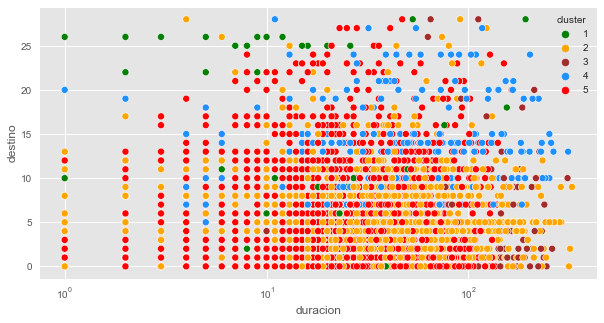

In [410]:
g =sns.scatterplot(x="duracion", y="destino",
              hue="cluster",
              data=data_gmm, 
              palette=['green','orange','brown','dodgerblue','red'], legend='full');
g.set(xscale="log");